In [3]:
# libraries
import pandas as pd
import numpy as np
from scipy.spatial.distance import pdist, squareform
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import fcluster
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import inconsistent, maxdists
import seaborn as sns
import random
from scipy.stats import f_oneway 
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
from pandas.plotting import parallel_coordinates
import skfuzzy as fuzz
from sklearn.preprocessing import MinMaxScaler

# Set seed globally
SEED = 123
np.random.seed(SEED)
random.seed(SEED)

In [5]:
# Loading the prepared EEG dataset from R
df = pd.read_csv("EEG_EO_binary.csv")
df.head()

Subject  Group    SegmentID  Delta_Cz  Theta_Cz  Alpha_Cz  Alpha1_Cz  \
0  subj01  FADHD     EO1_seg1  0.628339  0.455323  0.202542   0.079621   
1  subj01  FADHD   EO1_seg257  2.596684  5.646194  0.675855   0.282175   
2  subj01  FADHD   EO1_seg513  5.222945  4.457227  0.707277   0.456786   
3  subj01  FADHD   EO1_seg769  6.311082  2.228944  0.262392   0.150453   
4  subj01  FADHD  EO1_seg1025  9.498233  4.582733  0.664617   0.495032   

   Alpha2_Cz   Beta_Cz  Beta1_Cz  ...   Beta_F4  Beta1_F4  Beta2_F4  Beta3_F4  \
0   0.122921  0.975319  0.299434  ...  0.975319  0.299434  0.089598  0.586288   
1   0.393681  1.451338  0.184442  ...  1.451338  0.184442  0.404665  0.862231   
2   0.250491  1.407680  0.261415  ...  1.407680  0.261415  0.383806  0.762460   
3   0.111939  1.043179  0.268633  ...  1.043179  0.268633  0.341926  0.432619   
4   0.169585  1.064969  0.208508  ...  1.064969  0.208508  0.174312  0.682149   

   HighBeta_F4  Gamma_F4  Gamma1_F4  Gamma2_F4    TBR_F4  Group_binary  
0     1.085354  1.713325   1.214638   0.498687  0.466845          ADHD  
1     1.301291  1.773918   1.342285   0.431633  3.890337          ADHD  
2     1.391528  1.753287   1.151443   0.601844  3.166363          ADHD  
3     1.230342  1.279607   0.624963   0.654644  2.136685          ADHD  
4     1.084398  1.952425   1.041809   0.910616  4.303160          ADHD  

[5 rows x 32 columns]

In [33]:
df.describe()

Delta_Cz     Theta_Cz     Alpha_Cz    Alpha1_Cz    Alpha2_Cz  \
count  4582.000000  4582.000000  4582.000000  4582.000000  4582.000000   
mean     35.568203     8.007438     2.899427     1.858807     1.040620   
std     274.614734    43.797037    13.745968     9.492357     5.007702   
min       0.112253     0.046956     0.044480     0.014382     0.017693   
25%       1.231379     0.808632     0.515039     0.262232     0.210282   
50%       3.241408     1.692935     1.130501     0.600154     0.429019   
75%       9.581865     4.702329     2.423802     1.468644     0.848239   
max    6498.923549  1205.495612   364.648545   286.093075   182.040381   

           Beta_Cz     Beta1_Cz     Beta2_Cz     Beta3_Cz  HighBeta_Cz  ...  \
count  4582.000000  4582.000000  4582.000000  4582.000000  4582.000000  ...   
mean      3.275844     1.007040     0.783226     1.485579     0.779445  ...   
std      13.143117     5.747725     3.378215     4.554562     2.247654  ...   
min       0.154591     0.020289     0.022529     0.068927     0.036444  ...   
25%       1.023882     0.234971     0.205659     0.470730     0.223589  ...   
50%       1.801669     0.432455     0.389428     0.849948     0.396846  ...   
75%       2.965221     0.754645     0.684296     1.509325     0.733918  ...   
max     420.777501   202.617342    76.103009   142.057150    55.708968  ...   

         Alpha2_F4      Beta_F4     Beta1_F4     Beta2_F4     Beta3_F4  \
count  4582.000000  4582.000000  4582.000000  4582.000000  4582.000000   
mean      1.040620     3.275844     1.007040     0.783226     1.485579   
std       5.007702    13.143117     5.747725     3.378215     4.554562   
min       0.017693     0.154591     0.020289     0.022529     0.068927   
25%       0.210282     1.023882     0.234971     0.205659     0.470730   
50%       0.429019     1.801669     0.432455     0.389428     0.849948   
75%       0.848239     2.965221     0.754645     0.684296     1.509325   
max     182.040381   420.777501   202.617342    76.103009   142.057150   

       HighBeta_F4     Gamma_F4    Gamma1_F4    Gamma2_F4       TBR_F4  
count  4582.000000  4582.000000  4582.000000  4582.000000  4582.000000  
mean      0.779445     1.256113     0.647121     0.608992     2.091638  
std       2.247654     4.548054     2.215675     2.492568     2.797615  
min       0.036444     0.049177     0.018733     0.018145     0.023590  
25%       0.223589     0.288903     0.155530     0.119871     0.486502  
50%       0.396846     0.501286     0.274955     0.211741     1.085571  
75%       0.733918     1.031024     0.586253     0.444025     2.628196  
max      55.708968   104.941750    55.879732    67.451442    50.758920  

[8 rows x 28 columns]

In [11]:
print(list(df.columns[3:31])) # check the columns I want to use, just in case

['Delta_Cz', 'Theta_Cz', 'Alpha_Cz', 'Alpha1_Cz', 'Alpha2_Cz', 'Beta_Cz', 'Beta1_Cz', 'Beta2_Cz', 'Beta3_Cz', 'HighBeta_Cz', 'Gamma_Cz', 'Gamma1_Cz', 'Gamma2_Cz', 'TBR_Cz', 'Delta_F4', 'Theta_F4', 'Alpha_F4', 'Alpha1_F4', 'Alpha2_F4', 'Beta_F4', 'Beta1_F4', 'Beta2_F4', 'Beta3_F4', 'HighBeta_F4', 'Gamma_F4', 'Gamma1_F4', 'Gamma2_F4', 'TBR_F4']


In [7]:
# Segmenting the dataset to only the eye-open ADHD conditions
adhd_eyes_open = df[
    (df['Group_binary'] == 'ADHD') & 
    (df['SegmentID'].str.contains('EO', case=False))
]

print(adhd_eyes_open.shape)
adhd_eyes_open.head()

(2146, 32)


Subject  Group    SegmentID  Delta_Cz  Theta_Cz  Alpha_Cz  Alpha1_Cz  \
0  subj01  FADHD     EO1_seg1  0.628339  0.455323  0.202542   0.079621   
1  subj01  FADHD   EO1_seg257  2.596684  5.646194  0.675855   0.282175   
2  subj01  FADHD   EO1_seg513  5.222945  4.457227  0.707277   0.456786   
3  subj01  FADHD   EO1_seg769  6.311082  2.228944  0.262392   0.150453   
4  subj01  FADHD  EO1_seg1025  9.498233  4.582733  0.664617   0.495032   

   Alpha2_Cz   Beta_Cz  Beta1_Cz  ...   Beta_F4  Beta1_F4  Beta2_F4  Beta3_F4  \
0   0.122921  0.975319  0.299434  ...  0.975319  0.299434  0.089598  0.586288   
1   0.393681  1.451338  0.184442  ...  1.451338  0.184442  0.404665  0.862231   
2   0.250491  1.407680  0.261415  ...  1.407680  0.261415  0.383806  0.762460   
3   0.111939  1.043179  0.268633  ...  1.043179  0.268633  0.341926  0.432619   
4   0.169585  1.064969  0.208508  ...  1.064969  0.208508  0.174312  0.682149   

   HighBeta_F4  Gamma_F4  Gamma1_F4  Gamma2_F4    TBR_F4  Group_binary  
0     1.085354  1.713325   1.214638   0.498687  0.466845          ADHD  
1     1.301291  1.773918   1.342285   0.431633  3.890337          ADHD  
2     1.391528  1.753287   1.151443   0.601844  3.166363          ADHD  
3     1.230342  1.279607   0.624963   0.654644  2.136685          ADHD  
4     1.084398  1.952425   1.041809   0.910616  4.303160          ADHD  

[5 rows x 32 columns]

In [95]:
adhd_eyes_open.describe()  # normalization and outlier detection are needed

Delta_Cz     Theta_Cz     Alpha_Cz    Alpha1_Cz    Alpha2_Cz  \
count  2146.000000  2146.000000  2146.000000  2146.000000  2146.000000   
mean     71.462763    15.345669     4.836958     3.217710     1.619248   
std     398.076161    62.901864    19.820846    13.690168     7.227157   
min       0.200167     0.158072     0.109116     0.036775     0.025983   
25%       4.019293     2.133611     0.909639     0.486260     0.313170   
50%       7.872898     4.653191     1.985867     1.251052     0.598805   
75%      19.429089     8.901646     3.575288     2.411716     1.122855   
max    6498.923549  1205.495612   364.648545   286.093075   182.040381   

           Beta_Cz     Beta1_Cz     Beta2_Cz     Beta3_Cz  HighBeta_Cz  ...  \
count  2146.000000  2146.000000  2146.000000  2146.000000  2146.000000  ...   
mean      4.372815     1.556038     1.074756     1.742021     0.948281  ...   
std      18.989871     8.308006     4.853367     6.541998     3.183069  ...   
min       0.154591     0.024823     0.031950     0.068927     0.036444  ...   
25%       1.030768     0.283791     0.210640     0.423891     0.196106  ...   
50%       1.707584     0.507559     0.373130     0.729438     0.367866  ...   
75%       2.840270     0.870254     0.665118     1.337365     0.743611  ...   
max     420.777501   202.617342    76.103009   142.057150    55.708968  ...   

         Alpha2_F4      Beta_F4     Beta1_F4     Beta2_F4     Beta3_F4  \
count  2146.000000  2146.000000  2146.000000  2146.000000  2146.000000   
mean      1.619248     4.372815     1.556038     1.074756     1.742021   
std       7.227157    18.989871     8.308006     4.853367     6.541998   
min       0.025983     0.154591     0.024823     0.031950     0.068927   
25%       0.313170     1.030768     0.283791     0.210640     0.423891   
50%       0.598805     1.707584     0.507559     0.373130     0.729438   
75%       1.122855     2.840270     0.870254     0.665118     1.337365   
max     182.040381   420.777501   202.617342    76.103009   142.057150   

       HighBeta_F4     Gamma_F4    Gamma1_F4    Gamma2_F4       TBR_F4  
count  2146.000000  2146.000000  2146.000000  2146.000000  2146.000000  
mean      0.948281     1.704391     0.839716     0.864676     3.538319  
std       3.183069     6.479567     3.135677     3.561460     3.303632  
min       0.036444     0.049177     0.018733     0.019139     0.094318  
25%       0.196106     0.270674     0.146521     0.111923     1.516037  
50%       0.367866     0.510548     0.278125     0.215869     2.608674  
75%       0.743611     1.102822     0.597128     0.502948     4.374019  
max      55.708968   104.941750    55.879732    67.451442    50.758920  

[8 rows x 28 columns]

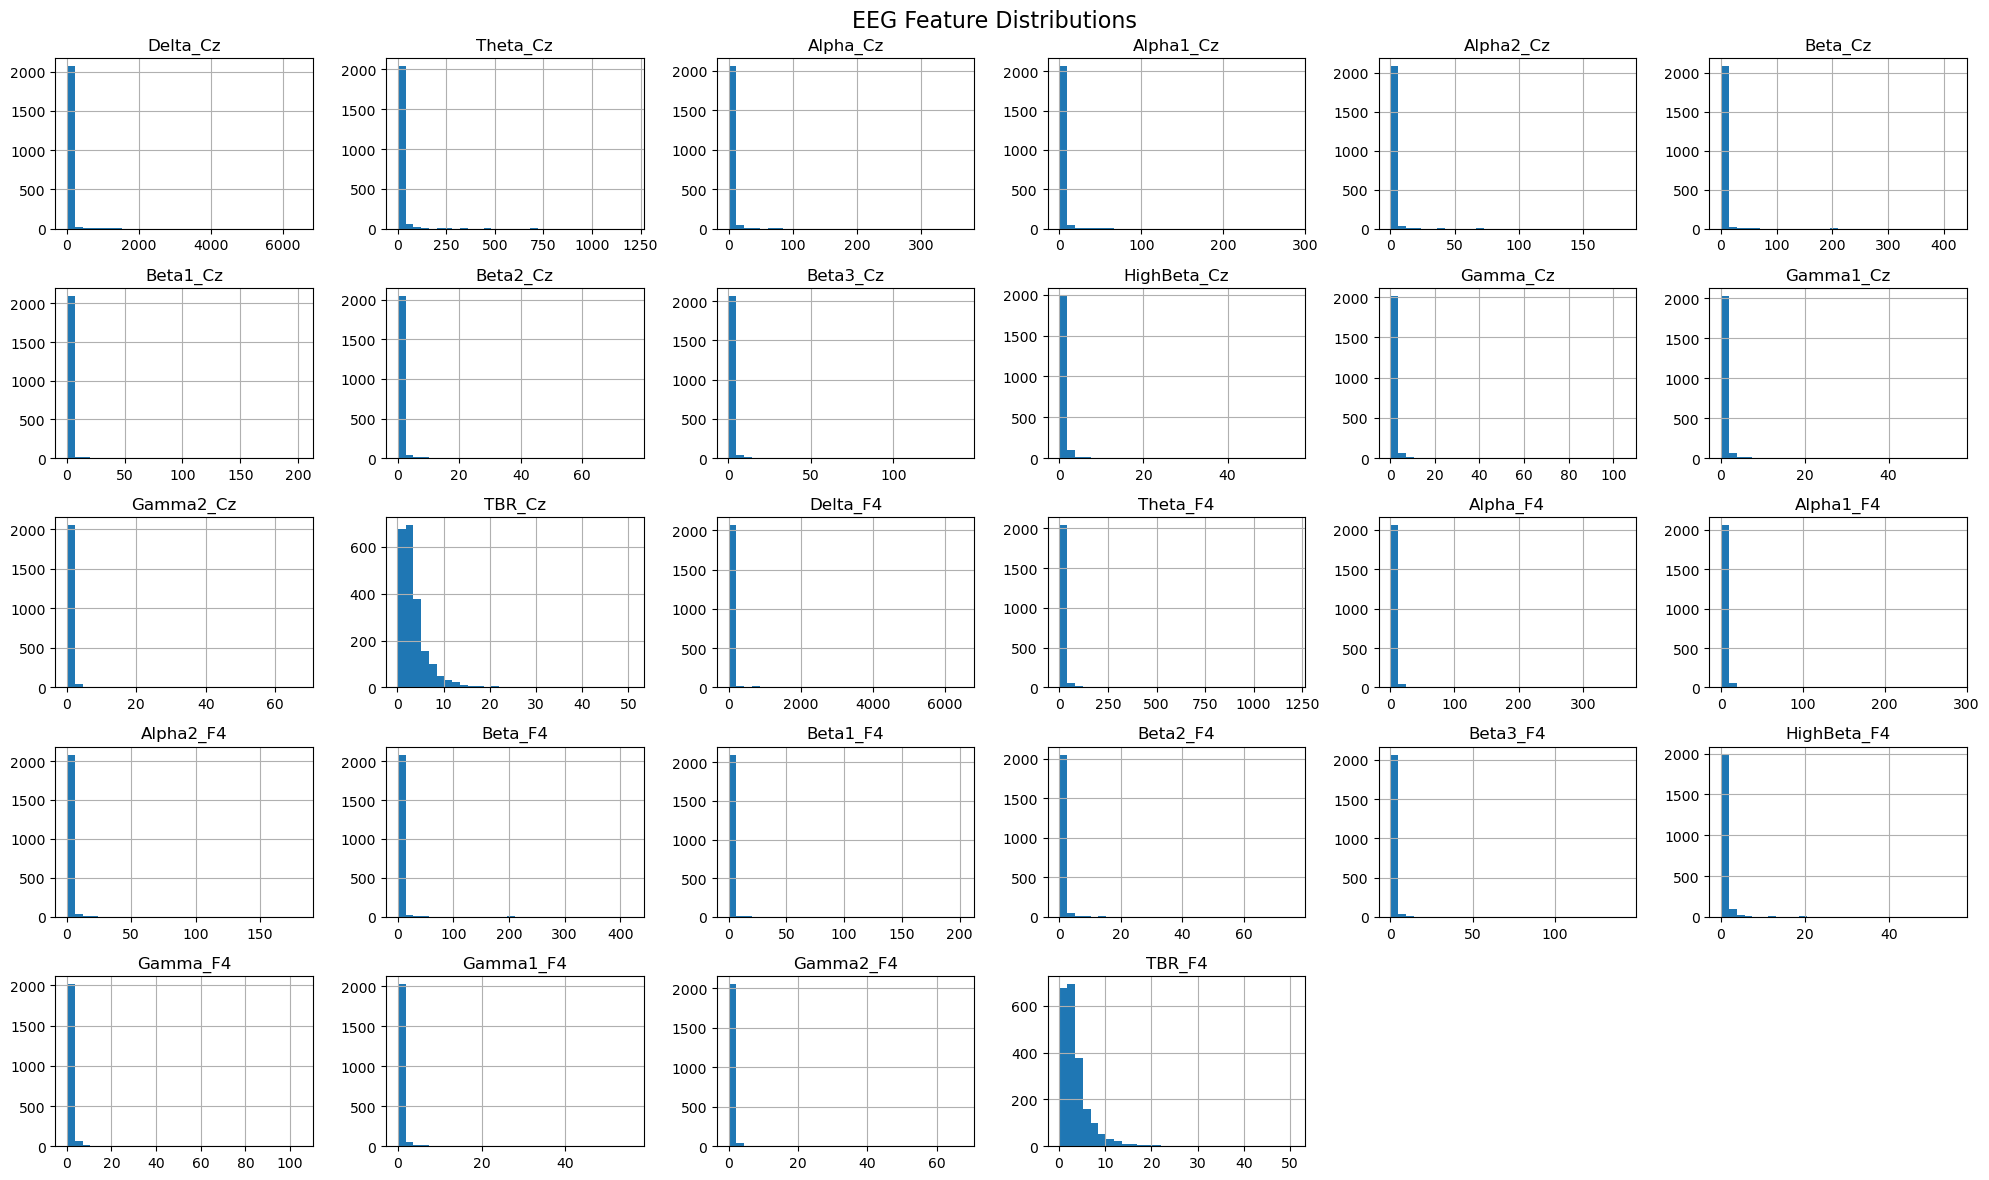

In [175]:
adhd_eyes_open[eeg_features].hist(bins=30, figsize=(20, 12), layout=(5, 6))
plt.suptitle("EEG Feature Distributions", fontsize=16)
plt.tight_layout()
plt.show()

# Log-transformation

In [9]:
# Select EEG feature columns
eeg_features = adhd_eyes_open.columns[3:31]
eeg_data = adhd_eyes_open[eeg_features]

# Apply log-transformation (log1p handles zeros safely)
eeg_logged = np.log1p(eeg_data)

# Replace original EEG features in the same dataframe
adhd_eyes_open_logged = adhd_eyes_open.copy()
adhd_eyes_open_logged[eeg_features] = eeg_logged

In [145]:
eeg_logged[eeg_features].describe() # features are log-transformed 

Delta_Cz     Theta_Cz     Alpha_Cz    Alpha1_Cz    Alpha2_Cz  \
count  2146.000000  2146.000000  2146.000000  2146.000000  2146.000000   
mean      2.456119     1.848046     1.185052     0.921664     0.609315   
std       1.343833     1.024021     0.760892     0.714017     0.558620   
min       0.182461     0.146757     0.103563     0.036115     0.025651   
25%       1.613289     1.142186     0.646914     0.396263     0.272444   
50%       2.183001     1.732220     1.093890     0.811398     0.469257   
75%       3.016958     2.292701     1.520669     1.227215     0.752762   
max       8.779546     7.095475     5.901673     5.659806     5.209707   

           Beta_Cz     Beta1_Cz     Beta2_Cz     Beta3_Cz  HighBeta_Cz  ...  \
count  2146.000000  2146.000000  2146.000000  2146.000000  2146.000000  ...   
mean      1.131220     0.543247     0.444691     0.688995     0.451062  ...   
std       0.691976     0.544646     0.483074     0.547595     0.464637  ...   
min       0.143746     0.024520     0.031450     0.066655     0.035796  ...   
25%       0.708414     0.249817     0.191149     0.353393     0.179071  ...   
50%       0.996057     0.410492     0.317092     0.547796     0.313252  ...   
75%       1.345543     0.626074     0.509896     0.849024     0.555958  ...   
max       6.044478     5.316242     4.345142     4.963244     4.037932  ...   

         Alpha2_F4      Beta_F4     Beta1_F4     Beta2_F4     Beta3_F4  \
count  2146.000000  2146.000000  2146.000000  2146.000000  2146.000000   
mean      0.609315     1.131220     0.543247     0.444691     0.688995   
std       0.558620     0.691976     0.544646     0.483074     0.547595   
min       0.025651     0.143746     0.024520     0.031450     0.066655   
25%       0.272444     0.708414     0.249817     0.191149     0.353393   
50%       0.469257     0.996057     0.410492     0.317092     0.547796   
75%       0.752762     1.345543     0.626074     0.509896     0.849024   
max       5.209707     6.044478     5.316242     4.345142     4.963244   

       HighBeta_F4     Gamma_F4    Gamma1_F4    Gamma2_F4       TBR_F4  
count  2146.000000  2146.000000  2146.000000  2146.000000  2146.000000  
mean      0.451062     0.598871     0.387511     0.356547     1.337053  
std       0.464637     0.602776     0.459942     0.488054     0.563194  
min       0.035796     0.048006     0.018560     0.018958     0.090131  
25%       0.179071     0.239547     0.136732     0.106091     0.922685  
50%       0.313252     0.412472     0.245394     0.195459     1.283340  
75%       0.555958     0.743280     0.468207     0.407428     1.681576  
max       4.037932     4.662889     4.040939     4.226125     3.946597  

[8 rows x 28 columns]

# Outliers

In [157]:
# outlier mask on the log-transformed EEG data
outliers = ((eeg_logged == 0.0) | (eeg_logged == 1.0)).any(axis=1)

# Remove those rows from the full log-transformed dataset
adhd_logged_clean = adhd_eyes_open_logged[~outliers].reset_index(drop=True)

# Extract EEG features from the cleaned dataset
eeg_feature_cols = list(adhd_logged_clean.columns[3:31])
eeg_data = adhd_logged_clean[eeg_feature_cols]

eeg_data = eeg_logged[~outliers].reset_index(drop=True)

# Count how many rows were flagged as outliers
num_outliers = outliers.sum()
print(f"Outliers removed: {num_outliers}")

Outliers removed: 0


In [159]:
eeg_feature_cols = list(adhd_eyes_open_logged.columns[3:31])  
eeg_data = adhd_eyes_open_logged[eeg_feature_cols]

# Data Exploration Analysis

In [155]:
eeg_data.describe()

Delta_Cz     Theta_Cz     Alpha_Cz    Alpha1_Cz    Alpha2_Cz  \
count  2146.000000  2146.000000  2146.000000  2146.000000  2146.000000   
mean      2.456119     1.848046     1.185052     0.921664     0.609315   
std       1.343833     1.024021     0.760892     0.714017     0.558620   
min       0.182461     0.146757     0.103563     0.036115     0.025651   
25%       1.613289     1.142186     0.646914     0.396263     0.272444   
50%       2.183001     1.732220     1.093890     0.811398     0.469257   
75%       3.016958     2.292701     1.520669     1.227215     0.752762   
max       8.779546     7.095475     5.901673     5.659806     5.209707   

           Beta_Cz     Beta1_Cz     Beta2_Cz     Beta3_Cz  HighBeta_Cz  ...  \
count  2146.000000  2146.000000  2146.000000  2146.000000  2146.000000  ...   
mean      1.131220     0.543247     0.444691     0.688995     0.451062  ...   
std       0.691976     0.544646     0.483074     0.547595     0.464637  ...   
min       0.143746     0.024520     0.031450     0.066655     0.035796  ...   
25%       0.708414     0.249817     0.191149     0.353393     0.179071  ...   
50%       0.996057     0.410492     0.317092     0.547796     0.313252  ...   
75%       1.345543     0.626074     0.509896     0.849024     0.555958  ...   
max       6.044478     5.316242     4.345142     4.963244     4.037932  ...   

         Alpha2_F4      Beta_F4     Beta1_F4     Beta2_F4     Beta3_F4  \
count  2146.000000  2146.000000  2146.000000  2146.000000  2146.000000   
mean      0.609315     1.131220     0.543247     0.444691     0.688995   
std       0.558620     0.691976     0.544646     0.483074     0.547595   
min       0.025651     0.143746     0.024520     0.031450     0.066655   
25%       0.272444     0.708414     0.249817     0.191149     0.353393   
50%       0.469257     0.996057     0.410492     0.317092     0.547796   
75%       0.752762     1.345543     0.626074     0.509896     0.849024   
max       5.209707     6.044478     5.316242     4.345142     4.963244   

       HighBeta_F4     Gamma_F4    Gamma1_F4    Gamma2_F4       TBR_F4  
count  2146.000000  2146.000000  2146.000000  2146.000000  2146.000000  
mean      0.451062     0.598871     0.387511     0.356547     1.337053  
std       0.464637     0.602776     0.459942     0.488054     0.563194  
min       0.035796     0.048006     0.018560     0.018958     0.090131  
25%       0.179071     0.239547     0.136732     0.106091     0.922685  
50%       0.313252     0.412472     0.245394     0.195459     1.283340  
75%       0.555958     0.743280     0.468207     0.407428     1.681576  
max       4.037932     4.662889     4.040939     4.226125     3.946597  

[8 rows x 28 columns]

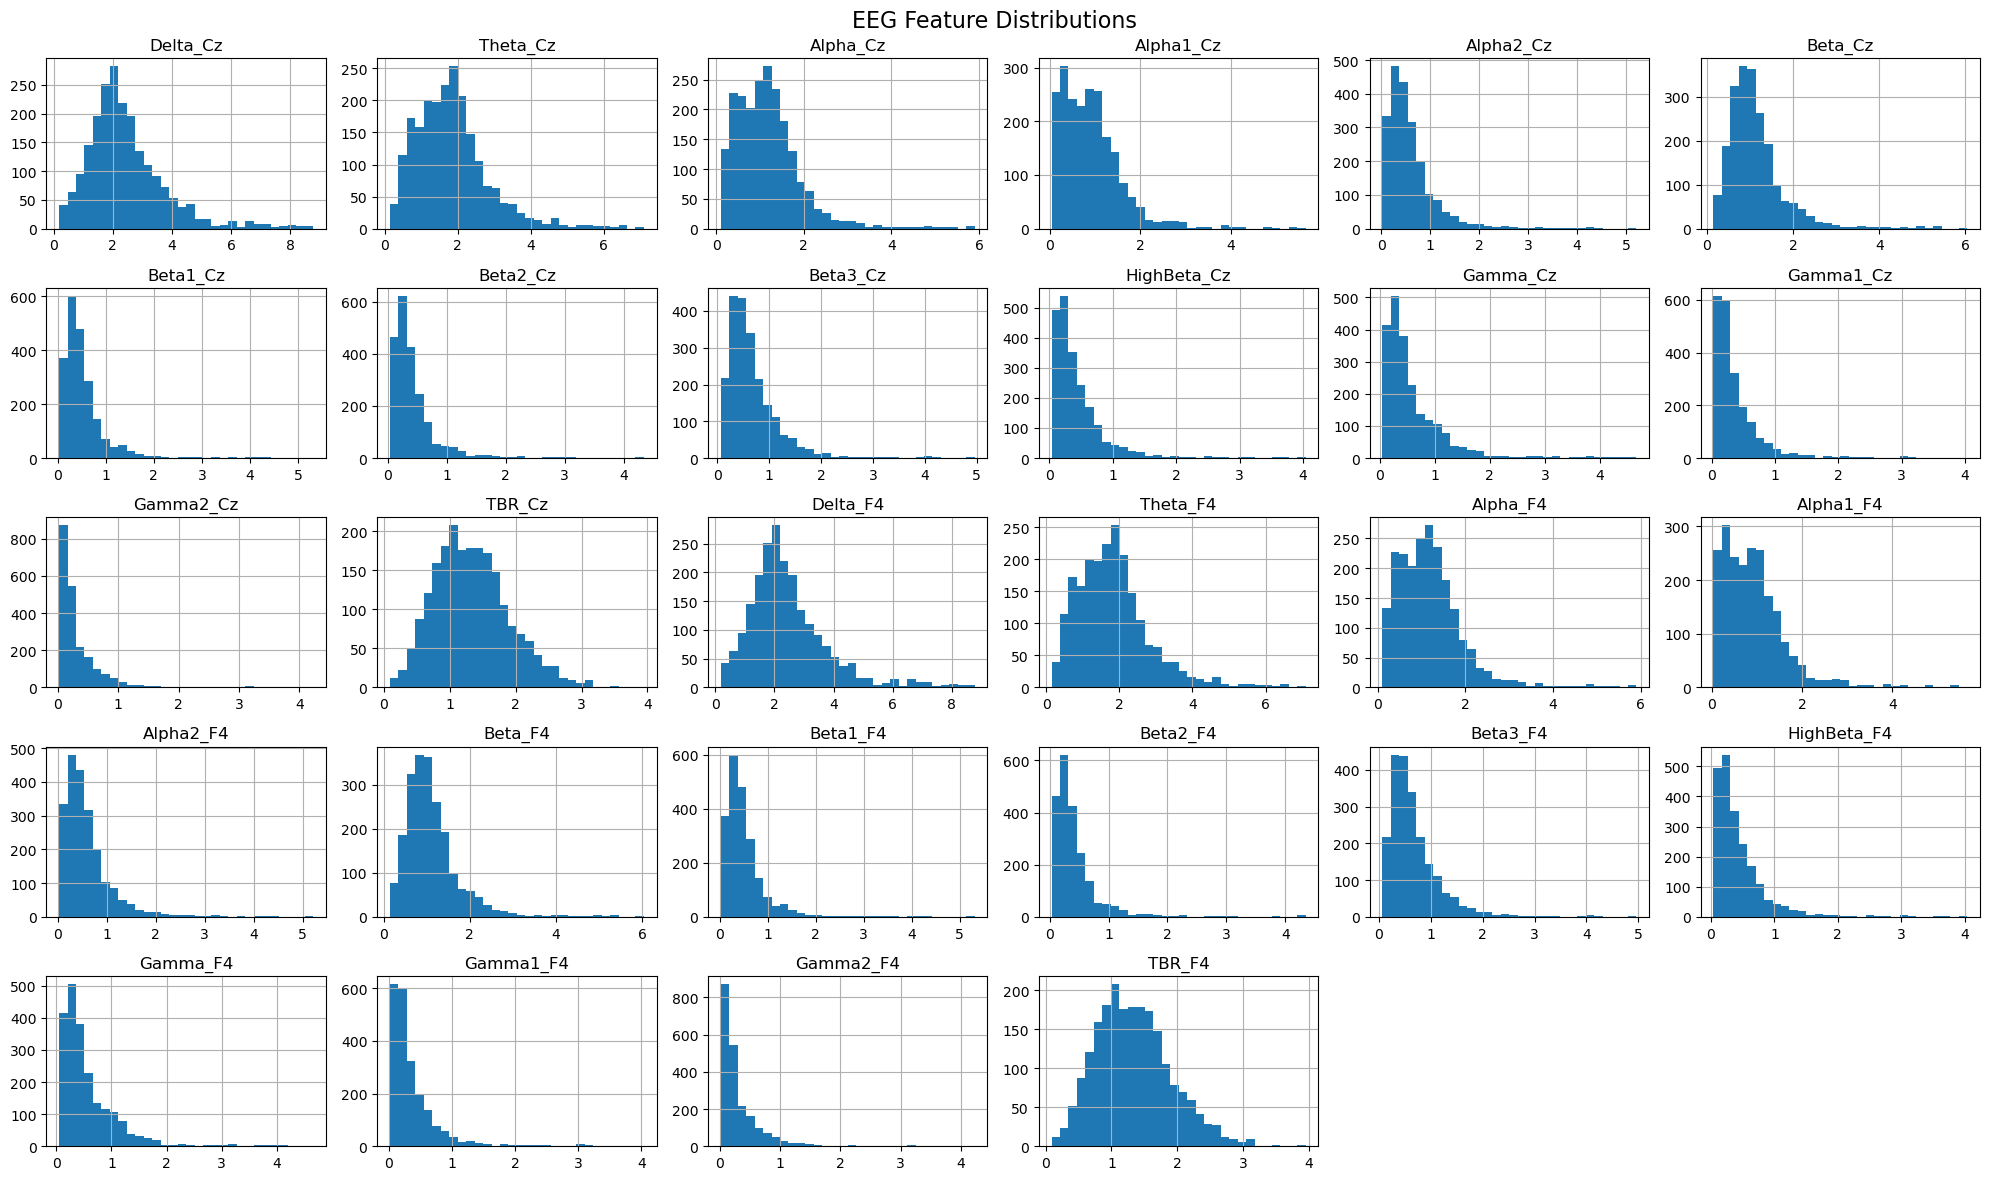

In [173]:
# Data Distribution after logging
eeg_data[eeg_feature_cols].hist(bins=30, figsize=(20, 12), layout=(5, 6))
plt.suptitle("EEG Feature Distributions", fontsize=16)
plt.tight_layout()
plt.show()

In [ ]:
# These are non-Gaussian distributions - logging was necessary to reduce skewness and variance 

# Correlation

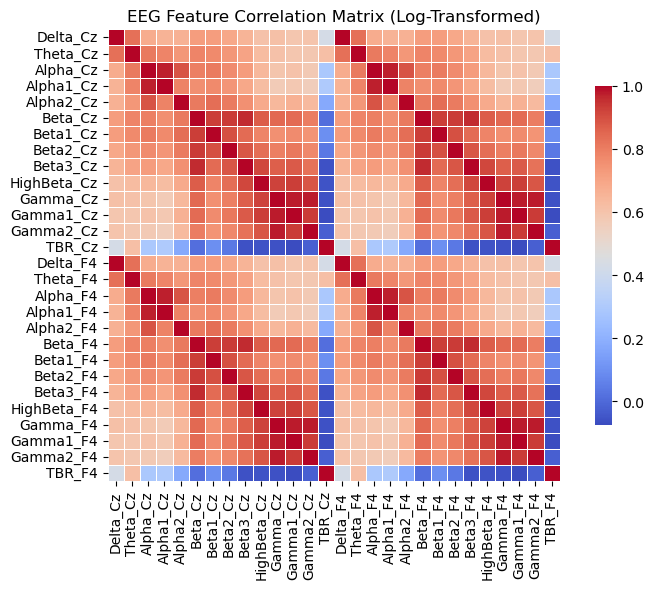

In [188]:
plt.figure(figsize=(8, 6))
corr_matrix = eeg_data.corr()

sns.heatmap(corr_matrix, cmap='coolwarm', annot=False, square=True,
            cbar_kws={"shrink": 0.75}, linewidths=0.5)
plt.title("EEG Feature Correlation Matrix (Log-Transformed)")
plt.tight_layout()
plt.show()

# High correlation within channels and features
# The Cz features and F4 features have relatively low correlation between each other, perhaps contributing to distinct patterns

# Hierarchical Clustering (Data-Driven) 

In [191]:
# Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
import scipy.cluster.hierarchy as sch
from scipy.stats import f_oneway
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from scipy.stats import kruskal

np.random.seed(123)


Best number of clusters: k = 2 (Silhouette = 0.592)


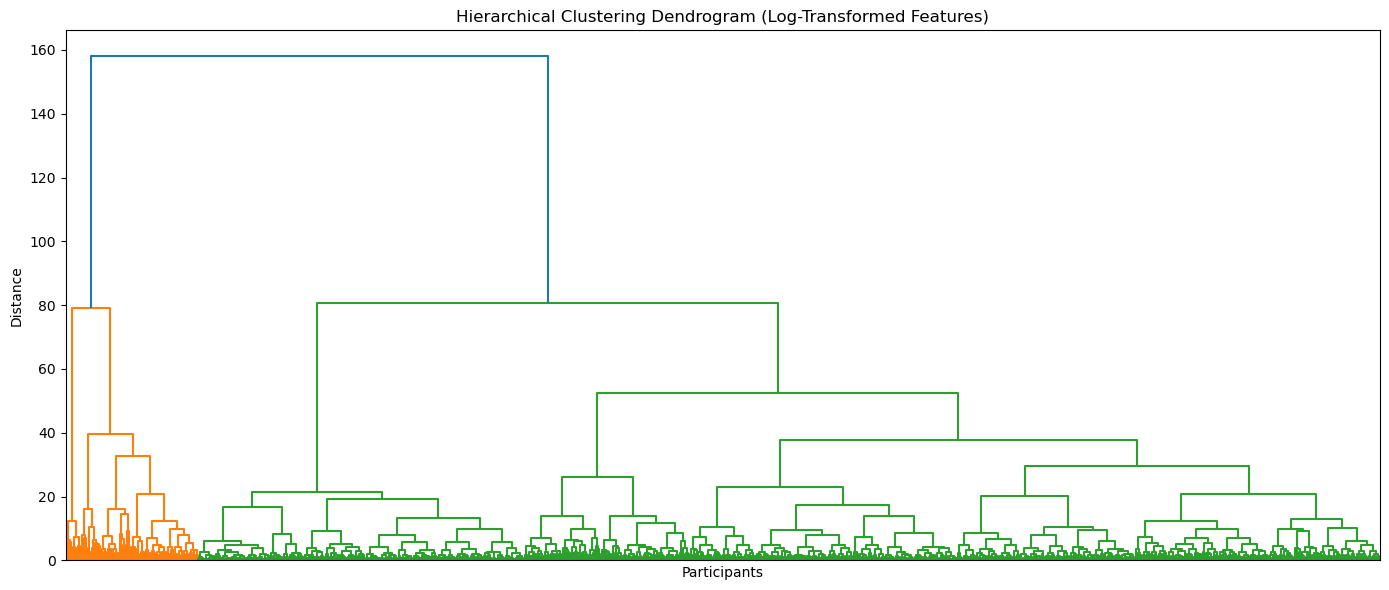

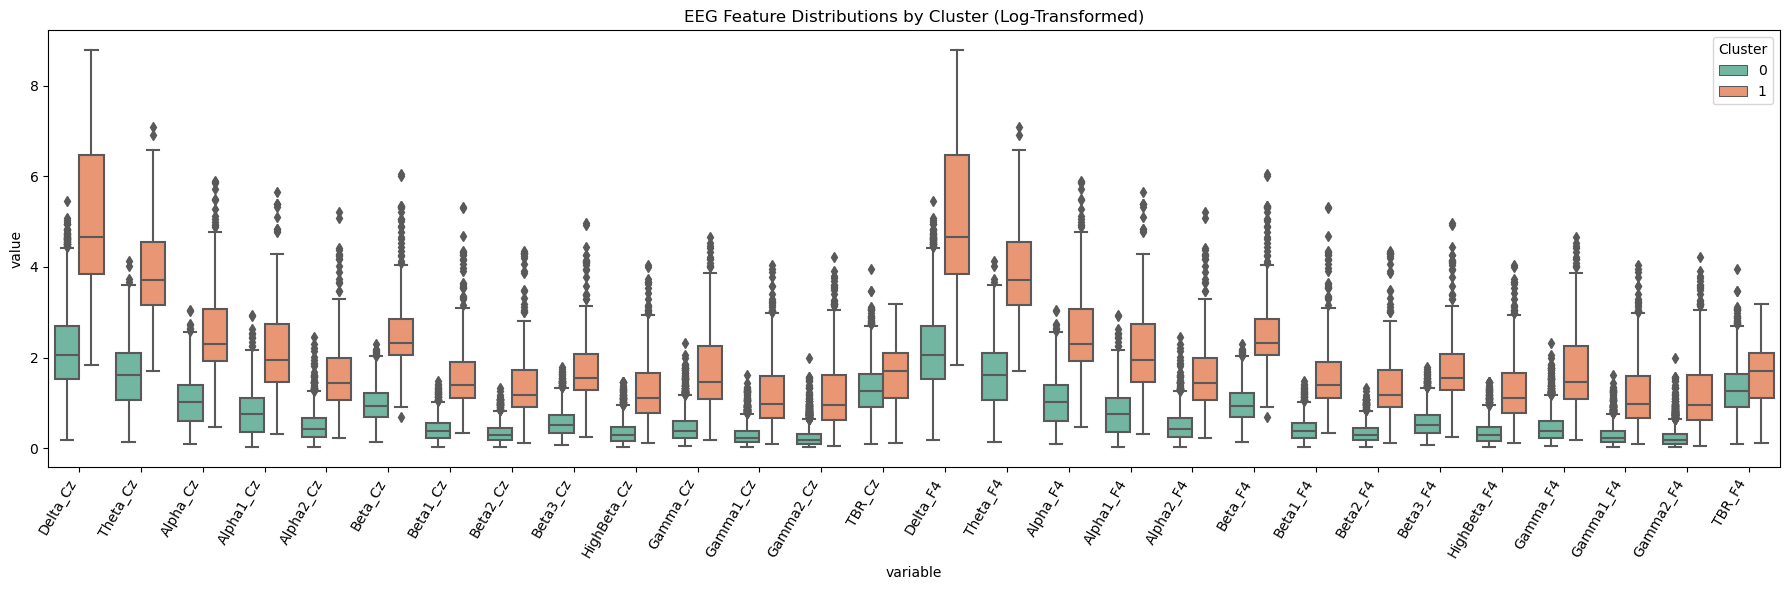

In [325]:
# Further standardize
scaler = StandardScaler()
eeg_scaled = scaler.fit_transform(eeg_data)  # log-transformed already

# Silhouette analysis to determine optimal k
silhouette_scores = []
k_values = range(2, 7)

for k in k_values:
    model = AgglomerativeClustering(n_clusters=k, linkage='ward', metric='euclidean')
    labels = model.fit_predict(eeg_data)
    score = silhouette_score(eeg_data, labels)
    silhouette_scores.append(score)

best_k = k_values[np.argmax(silhouette_scores)]
print(f"\nBest number of clusters: k = {best_k} (Silhouette = {max(silhouette_scores):.3f})")

# Final clustering with best k
final_model = AgglomerativeClustering(n_clusters=best_k, linkage='ward', metric='euclidean')
final_labels = final_model.fit_predict(eeg_data)
eeg_data_clustered = eeg_data.copy()
eeg_data_clustered['Cluster'] = final_labels

# Dendrogram
linkage_matrix = sch.linkage(eeg_data, method='ward')
plt.figure(figsize=(14, 6))
sch.dendrogram(linkage_matrix, no_labels=True)
plt.title('Hierarchical Clustering Dendrogram (Log-Transformed Features)')
plt.xlabel('Participants')
plt.ylabel('Distance')
plt.tight_layout()
plt.show()

# Boxplot of EEG feature distributions by cluster
eeg_long = pd.melt(
    eeg_data_clustered.reset_index(drop=True),
    id_vars='Cluster',
    value_vars=eeg_feature_cols,
    var_name='variable',
    value_name='value'
)

plt.figure(figsize=(18, 6))
sns.boxplot(x='variable', y='value', hue='Cluster', data=eeg_long, palette='Set2')
plt.xticks(rotation=60, ha='right')
plt.title('EEG Feature Distributions by Cluster (Log-Transformed)')
plt.tight_layout()
plt.show()

# Store final cluster labels in the original log-transformed dataset
adhd_eyes_open_logged['Cluster_Ward'] = final_labels


Top EEG features by Kruskal–Wallis p-value and median difference:
          H_statistic        p_value  Median_Spread
Feature                                            
Cluster   2145.000000   0.000000e+00       1.000000
Beta_F4    551.969497  4.694031e-122       1.379804
Beta_Cz    551.969497  4.694031e-122       1.379804
Beta1_F4   533.802577  4.204198e-118       1.023150
Beta1_Cz   533.802577  4.204198e-118       1.023150
Beta2_F4   522.107086  1.472717e-115       0.891283
Beta2_Cz   522.107086  1.472717e-115       0.891283
Theta_Cz   501.596354  4.272056e-111       2.085119
Theta_F4   501.596354  4.272056e-111       2.085119
Delta_Cz   498.215272  2.324301e-110       2.588922


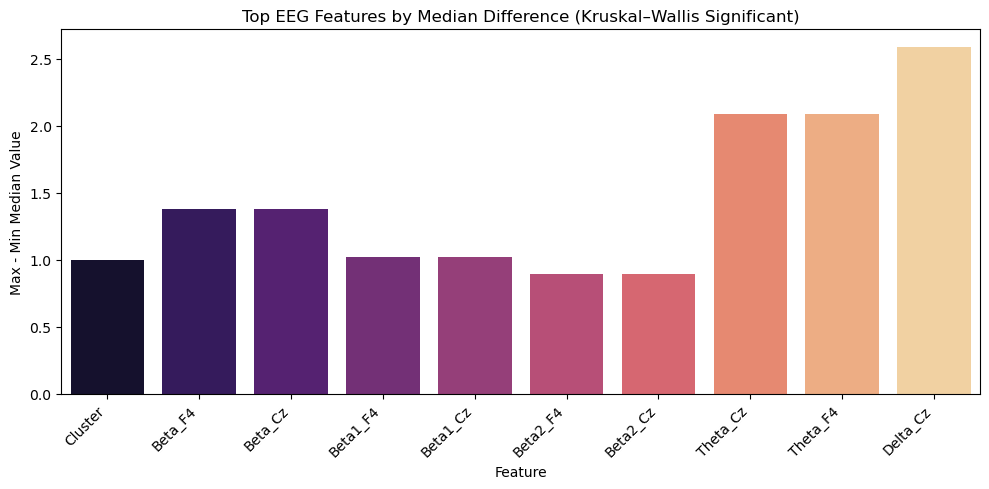

In [327]:
# Compute median EEG values per cluster
cluster_medians = eeg_data_clustered.groupby('Cluster')[eeg_feature_cols].median()
median_spread = (cluster_medians.max() - cluster_medians.min())

# Run Kruskal-Wallis test per feature
kruskal_results = []

grouped = eeg_data_clustered.groupby('Cluster')
for feature in eeg_feature_cols:
    values = [group[feature].values for _, group in grouped]
    h_stat, p = kruskal(*values)
    kruskal_results.append((feature, h_stat, p))

kruskal_df = pd.DataFrame(kruskal_results, columns=['Feature', 'H_statistic', 'p_value'])
kruskal_df['-log10_p'] = -np.log10(kruskal_df['p_value'].replace(0, 1e-300))


# Merge with median spread and sort
kruskal_df.set_index('Feature', inplace=True)
kruskal_df['Median_Spread'] = median_spread
kruskal_df = kruskal_df.sort_values('p_value')

# Print top results
print("\nTop EEG features by Kruskal–Wallis p-value and median difference:")
print(kruskal_df[['H_statistic', 'p_value', 'Median_Spread']].head(10))

# Barplot of top features
plt.figure(figsize=(10, 5))
sns.barplot(data=kruskal_df.head(10).reset_index(), x='Feature', y='Median_Spread', palette='magma')
plt.title('Top EEG Features by Median Difference (Kruskal–Wallis Significant)')
plt.ylabel('Max - Min Median Value')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


In [329]:
# Compute medians per cluster
cluster_medians = eeg_data_clustered.groupby('Cluster')[eeg_feature_cols].median()

# For each cluster, find top N features by median value
top_n = 5
top_features_per_cluster = {}

for cluster in cluster_medians.index:
    top_feats = cluster_medians.loc[cluster].sort_values(ascending=False).head(top_n)
    top_features_per_cluster[f"Cluster {cluster}"] = top_feats

# Print results
for cluster_name, features in top_features_per_cluster.items():
    print(f"\n {cluster_name} — Top {top_n} Features (Median Values):")
    print(features)



 Cluster 0 — Top 5 Features (Median Values):
Delta_Cz    2.066567
Delta_F4    2.066567
Theta_F4    1.618058
Theta_Cz    1.618058
TBR_Cz      1.259193
Name: 0, dtype: float64

 Cluster 1 — Top 5 Features (Median Values):
Delta_Cz    4.655489
Delta_F4    4.655489
Theta_F4    3.703177
Theta_Cz    3.703177
Beta_F4     2.316566
Name: 1, dtype: float64


In [311]:
# number of subjects per cluster
cluster_counts = pd.Series(final_labels).value_counts().sort_index()
print("\nParticipants per cluster:")
print(cluster_counts)


Participants per cluster:
0    1930
1     216
Name: count, dtype: int64


# Removing TBR from the analysis

Columns used: ['Delta_Cz', 'Theta_Cz', 'Alpha_Cz', 'Alpha1_Cz', 'Alpha2_Cz', 'Beta_Cz', 'Beta1_Cz', 'Beta2_Cz', 'Beta3_Cz', 'HighBeta_Cz', 'Gamma_Cz', 'Gamma1_Cz', 'Gamma2_Cz', 'Delta_F4', 'Theta_F4', 'Alpha_F4', 'Alpha1_F4', 'Alpha2_F4', 'Beta_F4', 'Beta1_F4', 'Beta2_F4', 'Beta3_F4', 'HighBeta_F4', 'Gamma_F4', 'Gamma1_F4', 'Gamma2_F4', 'Cluster']

Best number of clusters: k = 2 (Silhouette = 0.611)


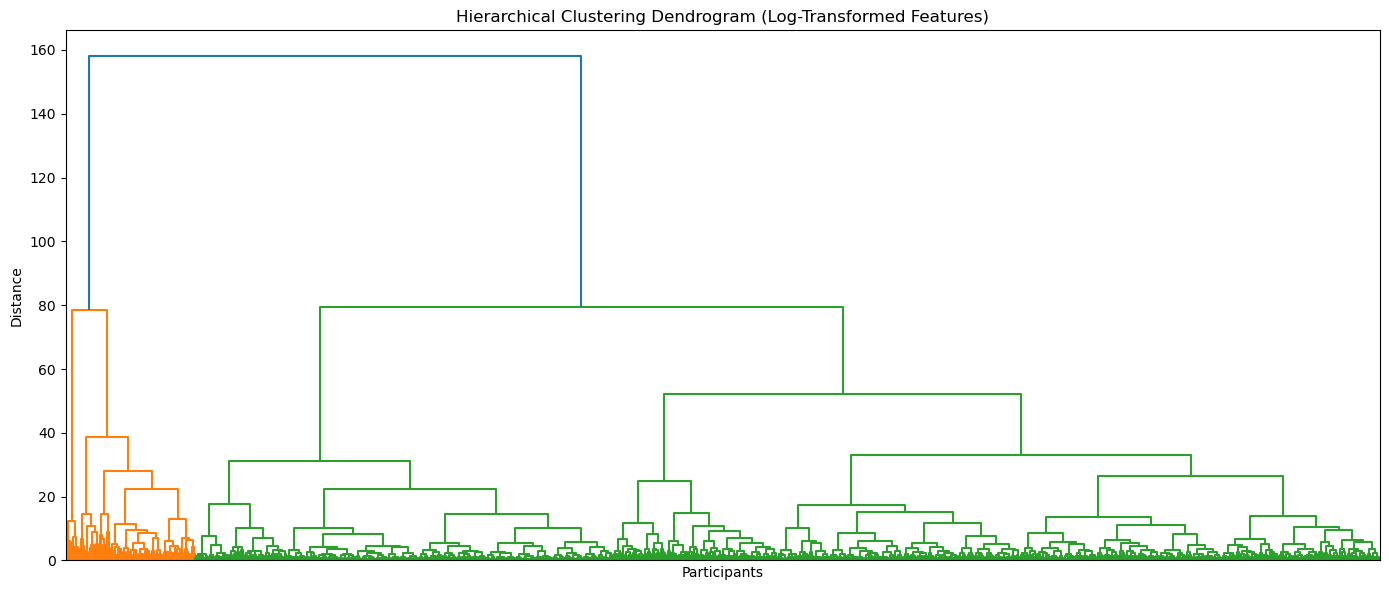

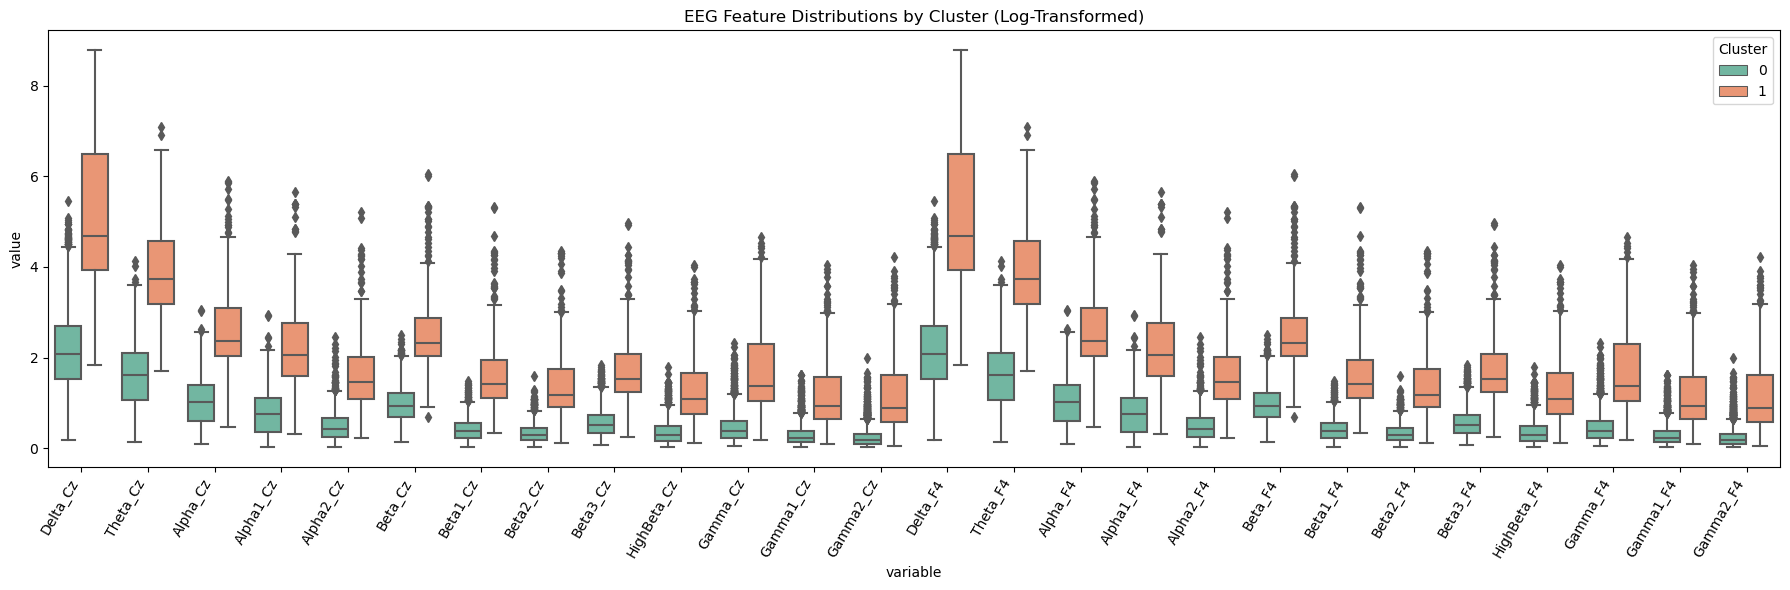

In [333]:
# drop the two TBR cols:
feature_cols = [c for c in eeg_data.columns if "TBR" not in c.upper()]
eeg_data_removed_cols = eeg_data[feature_cols].copy()   # <-- 26 columns, no TBR

print("Columns used:", list(X.columns))        # sanity‑check

# Further standardize
scaler = StandardScaler()
eeg_scaled = scaler.fit_transform(eeg_data_removed_cols)
eeg_scaled_df = pd.DataFrame(eeg_scaled, columns=feature_cols)


# Silhouette analysis to determine optimal k
silhouette_scores = []
k_values = range(2, 7)

for k in k_values:
    model = AgglomerativeClustering(n_clusters=k, linkage='ward', metric='euclidean')
    labels = model.fit_predict(eeg_data_removed_cols)
    score = silhouette_score(eeg_data_removed_cols, labels)
    silhouette_scores.append(score)

best_k = k_values[np.argmax(silhouette_scores)]
print(f"\nBest number of clusters: k = {best_k} (Silhouette = {max(silhouette_scores):.3f})")

# Final clustering with best k
final_model = AgglomerativeClustering(n_clusters=best_k, linkage='ward', metric='euclidean')
final_labels = final_model.fit_predict(eeg_data_removed_cols)
eeg_data_clustered = eeg_data_removed_cols.copy()
eeg_data_clustered['Cluster'] = final_labels

# Dendrogram
linkage_matrix = sch.linkage(eeg_data_removed_cols, method='ward')
plt.figure(figsize=(14, 6))
sch.dendrogram(linkage_matrix, no_labels=True)
plt.title('Hierarchical Clustering Dendrogram (Log-Transformed Features)')
plt.xlabel('Participants')
plt.ylabel('Distance')
plt.tight_layout()
plt.show()

# Boxplot of EEG feature distributions by cluster
eeg_long = pd.melt(
    eeg_data_clustered.reset_index(drop=True),
    id_vars='Cluster',
    value_vars=eeg_data_removed_cols,
    var_name='variable',
    value_name='value'
)

plt.figure(figsize=(18, 6))
sns.boxplot(x='variable', y='value', hue='Cluster', data=eeg_long, palette='Set2')
plt.xticks(rotation=60, ha='right')
plt.title('EEG Feature Distributions by Cluster (Log-Transformed)')
plt.tight_layout()
plt.show()

# Store final cluster labels in the original log-transformed dataset
eeg_data_removed_cols['Cluster_Ward'] = final_labels


Top EEG features by Kruskal–Wallis p-value and median difference:
          H_statistic        p_value  Median_Spread
Feature                                            
Cluster   2145.000000   0.000000e+00       1.000000
Beta_F4    533.922467  3.959140e-118       1.377674
Beta_Cz    533.922467  3.959140e-118       1.377674
Beta1_F4   519.572513  5.242607e-115       1.032198
Beta1_Cz   519.572513  5.242607e-115       1.032198
Theta_Cz   511.597151  2.849190e-113       2.101274
Theta_F4   511.597151  2.849190e-113       2.101274
Beta2_F4   501.459206  4.575909e-111       0.892120
Beta2_Cz   501.459206  4.575909e-111       0.892120
Delta_Cz   493.676628  2.258529e-109       2.610529


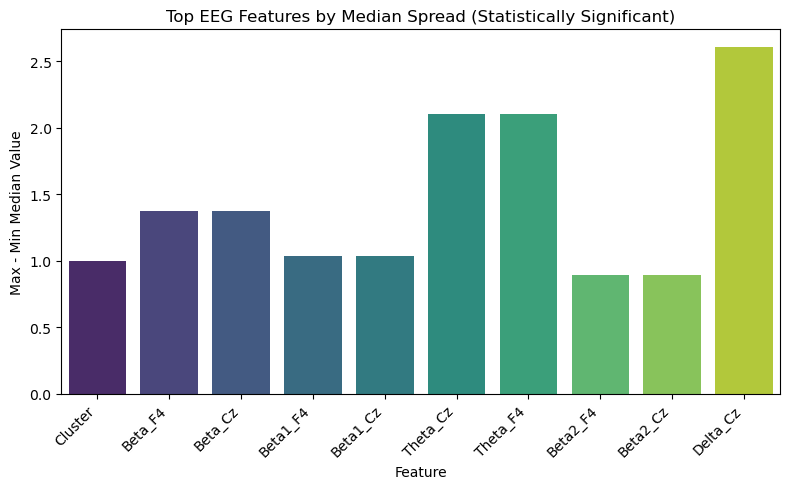

In [335]:
# Compute median per cluster
cluster_medians = eeg_data_clustered.groupby('Cluster')[feature_cols].median()
median_spread = (cluster_medians.max() - cluster_medians.min())

# Run Kruskal-Wallis H-test per feature

kruskal_results = []

grouped = eeg_data_clustered.groupby('Cluster')
for feature in feature_cols:
    values = [group[feature].values for _, group in grouped]
    h_stat, p = kruskal(*values)
    kruskal_results.append((feature, h_stat, p))

kruskal_df = pd.DataFrame(kruskal_results, columns=['Feature', 'H_statistic', 'p_value'])
kruskal_df['-log10_p'] = -np.log10(kruskal_df['p_value'].replace(0, 1e-300))

# Merge median spread and p-values
combined_df = kruskal_df.set_index('Feature')
combined_df['Median_Spread'] = median_spread
combined_df = combined_df.sort_values('p_value')  # sort by significance

# Display top features
print("\nTop EEG features by Kruskal–Wallis p-value and median difference:")
print(combined_df[['H_statistic', 'p_value', 'Median_Spread']].head(10))

# Visualize
plt.figure(figsize=(8, 5))
sns.barplot(
    data=combined_df.head(10).reset_index(),
    x='Feature',
    y='Median_Spread',
    palette='viridis'
)
plt.title('Top EEG Features by Median Spread (Statistically Significant)')
plt.ylabel('Max - Min Median Value')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


In [337]:
# Top median features per cluster (TBR removed)
top_n = 5  # number of features to show per cluster
top_features_per_cluster = {}

# Compute cluster-wise feature medians
cluster_medians = eeg_data_clustered.groupby('Cluster')[feature_cols].median()

# Extract top N features per cluster based on median value
for cluster in cluster_medians.index:
    top_feats = cluster_medians.loc[cluster].sort_values(ascending=False).head(top_n)
    top_features_per_cluster[f"Cluster {cluster}"] = top_feats

# Print results
for cluster_name, features in top_features_per_cluster.items():
    print(f"\n {cluster_name} — Top {top_n} Features (Median Values):")
    print(features)



 Cluster 0 — Top 5 Features (Median Values):
Delta_Cz    2.067343
Delta_F4    2.067343
Theta_F4    1.621583
Theta_Cz    1.621583
Alpha_F4    1.019849
Name: 0, dtype: float64

 Cluster 1 — Top 5 Features (Median Values):
Delta_Cz    4.677872
Delta_F4    4.677872
Theta_F4    3.722858
Theta_Cz    3.722858
Alpha_F4    2.371400
Name: 1, dtype: float64


In [339]:
# How many participants in each cluster
cluster_counts = eeg_data_clustered["Cluster"].value_counts().sort_index()
print("\nParticipants per cluster:")
print(cluster_counts)


Participants per cluster:
Cluster
0    1935
1     211
Name: count, dtype: int64


# Redo with PCA

PCA reduced dimensionality from 28 to 3 components

Best number of clusters (PCA space): k = 2 (Silhouette = 0.940)


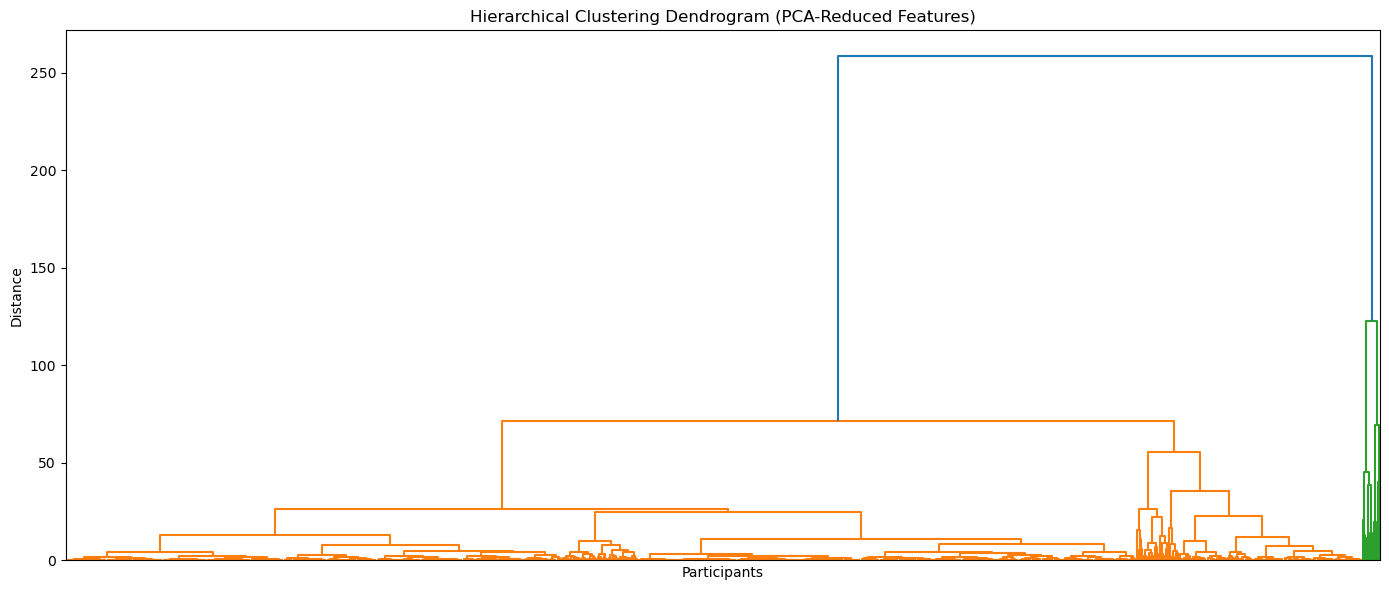


Top PCA components distinguishing clusters (Kruskal-Wallis):
  Component  H_statistic       p_value   -log10_p
0       PC1    82.736892  9.373536e-20  19.028097
2       PC3     6.525537  1.063364e-02   1.973318
1       PC2     0.056169  8.126561e-01   0.090093


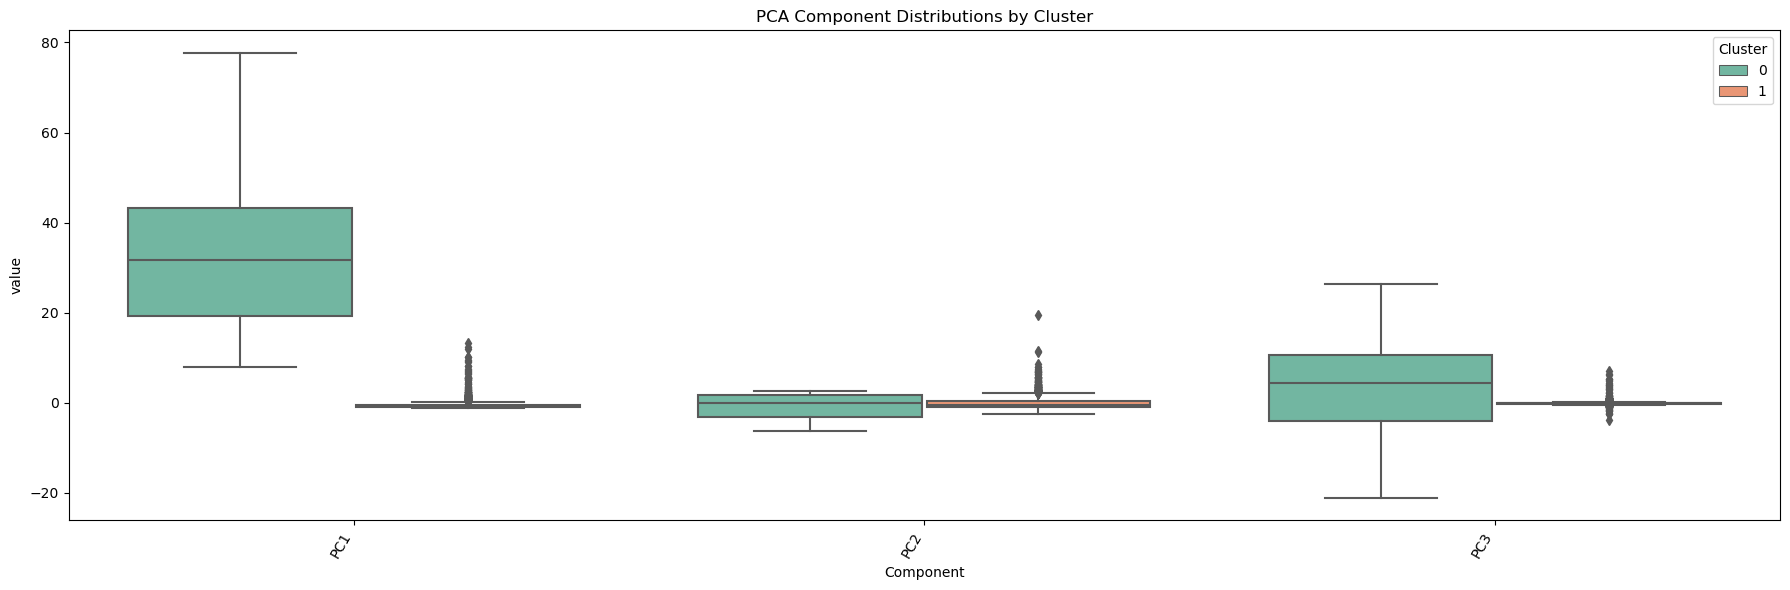

In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
from sklearn.cluster import AgglomerativeClustering
from scipy.stats import kruskal
import scipy.cluster.hierarchy as sch

# Standardize EEG features
scaler = StandardScaler()
eeg_scaled = scaler.fit_transform(eeg_data)

# PCA – retain enough components to explain 85% variance
pca = PCA(n_components=0.85, random_state=123)
eeg_pca = pca.fit_transform(eeg_scaled)

print(f"PCA reduced dimensionality from {eeg_data.shape[1]} to {eeg_pca.shape[1]} components")

# Silhouette analysis for optimal number of clusters
silhouette_scores = []
k_values = range(2, 7)

for k in k_values:
    model = AgglomerativeClustering(n_clusters=k, linkage='ward', metric='euclidean')
    labels = model.fit_predict(eeg_pca)
    score = silhouette_score(eeg_pca, labels)
    silhouette_scores.append(score)

best_k = k_values[np.argmax(silhouette_scores)]
print(f"\nBest number of clusters (PCA space): k = {best_k} (Silhouette = {max(silhouette_scores):.3f})")

# Final clustering
final_model = AgglomerativeClustering(n_clusters=best_k, linkage='ward', metric='euclidean')
final_labels = final_model.fit_predict(eeg_pca)

# Store cluster labels
eeg_data_clustered = eeg_data.copy()
eeg_data_clustered['Cluster'] = final_labels

# Dendrogram of hierarchical clustering
linkage_matrix = sch.linkage(eeg_pca, method='ward')
plt.figure(figsize=(14, 6))
sch.dendrogram(linkage_matrix, no_labels=True)
plt.title('Hierarchical Clustering Dendrogram (PCA-Reduced Features)')
plt.xlabel('Participants')
plt.ylabel('Distance')
plt.tight_layout()
plt.show()

# Create PCA component DataFrame
pca_df = pd.DataFrame(eeg_pca, columns=[f'PC{i+1}' for i in range(eeg_pca.shape[1])])
pca_df['Cluster'] = final_labels

# Kruskal-Wallis test for each component
kruskal_pca_results = []
grouped = pca_df.groupby('Cluster')

for component in [col for col in pca_df.columns if col.startswith("PC")]:
    values = [group[component].values for _, group in grouped]
    h_stat, p = kruskal(*values)
    kruskal_pca_results.append((component, h_stat, p))

kruskal_pca_df = pd.DataFrame(kruskal_pca_results, columns=['Component', 'H_statistic', 'p_value'])
kruskal_pca_df['-log10_p'] = -np.log10(kruskal_pca_df['p_value'].replace(0, 1e-300))
kruskal_pca_df = kruskal_pca_df.sort_values('p_value')

# Print top components by significance
print("\nTop PCA components distinguishing clusters (Kruskal-Wallis):")
print(kruskal_pca_df.head(10))

# Visualization: Boxplot of PCA components by cluster
pca_long = pd.melt(
    pca_df.reset_index(drop=True),
    id_vars='Cluster',
    value_vars=[col for col in pca_df.columns if col.startswith("PC")],
    var_name='Component',
    value_name='value'
)

plt.figure(figsize=(18, 6))
sns.boxplot(x='Component', y='value', hue='Cluster', data=pca_long, palette='Set2')
plt.xticks(rotation=60, ha='right')
plt.title('PCA Component Distributions by Cluster')
plt.tight_layout()
plt.show()


In [13]:
# Number of participants per cluster on PCA
cluster_counts = eeg_data_clustered['Cluster'].value_counts().sort_index()

print("Number of participants per cluster PCA:")
print(cluster_counts)

Number of participants per cluster PCA:
Cluster
0      28
1    2118
Name: count, dtype: int64


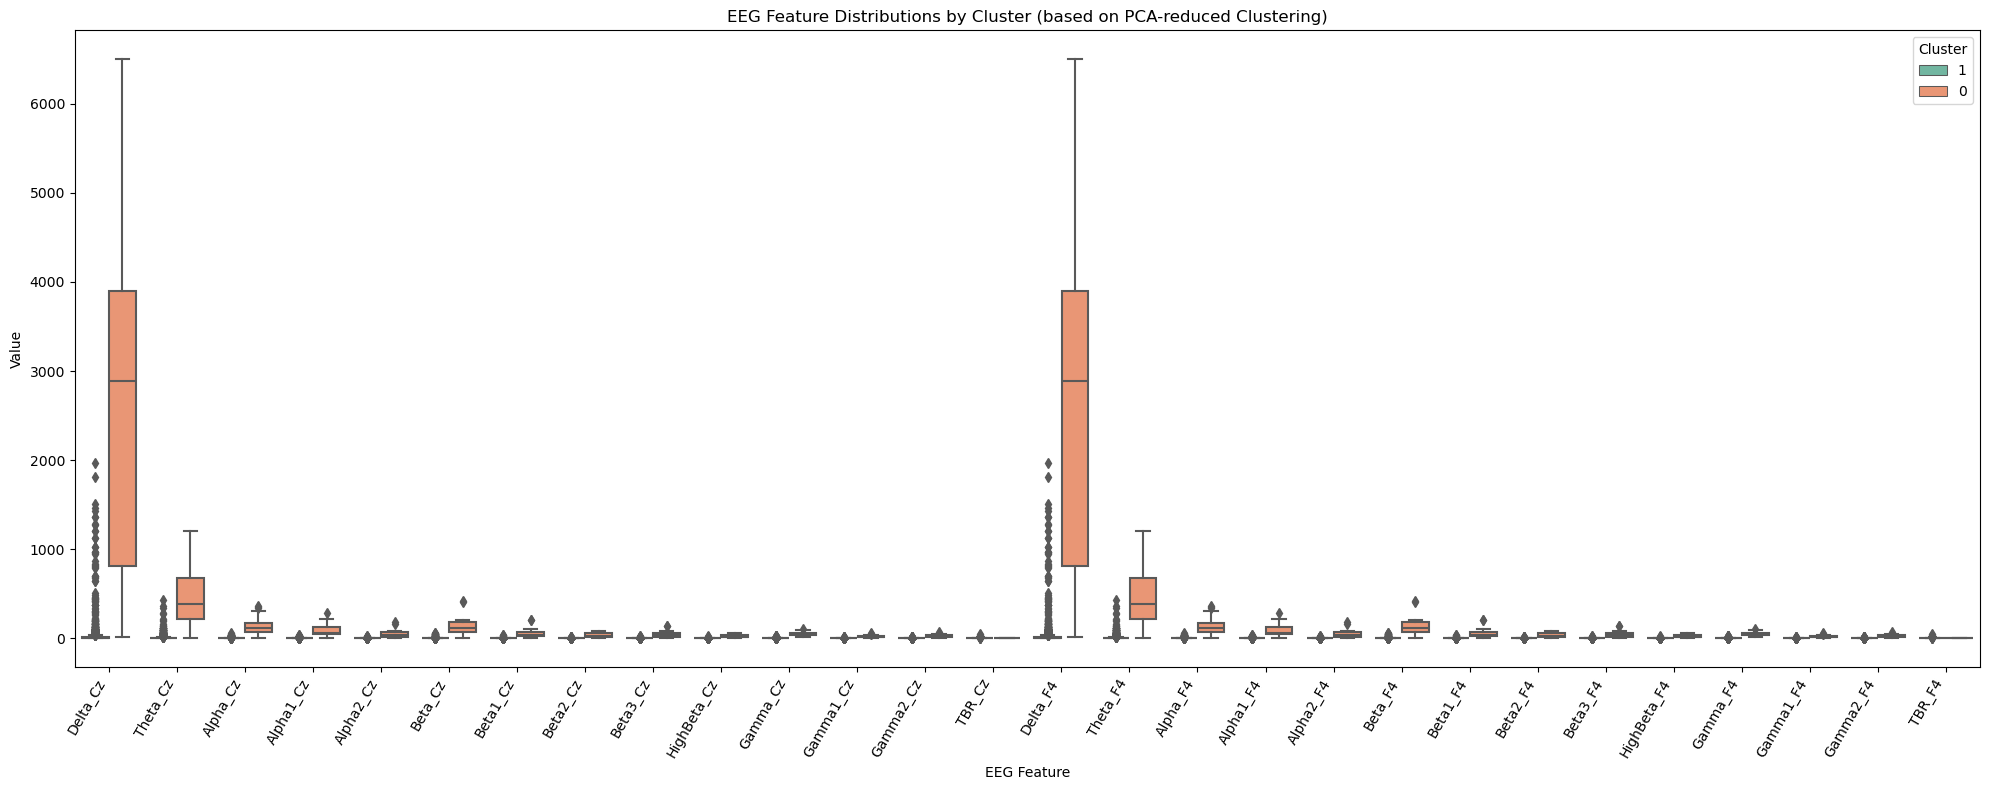

In [17]:
# Ensure the cluster labels are attached
eeg_data_clustered = eeg_data.copy()
eeg_data_clustered['Cluster'] = final_labels  # from clustering on PCA-reduced data

# Ensure Cluster is categorical
eeg_data_clustered['Cluster'] = eeg_data_clustered['Cluster'].astype(str)

# Define your EEG feature columns
eeg_feature_cols = [col for col in eeg_data.columns if col not in ['Cluster']]

# Melt the DataFrame to long format for plotting
eeg_long = pd.melt(
    eeg_data_clustered.reset_index(drop=True),
    id_vars='Cluster',
    value_vars=eeg_feature_cols,
    var_name='Feature',
    value_name='Value'
)

# boxplot
plt.figure(figsize=(20, 8))
sns.boxplot(x='Feature', y='Value', hue='Cluster', data=eeg_long, palette='Set2')
plt.xticks(rotation=60, ha='right')
plt.title('EEG Feature Distributions by Cluster (based on PCA-reduced Clustering)')
plt.xlabel('EEG Feature')
plt.ylabel('Value')
plt.legend(title='Cluster')
plt.tight_layout()
plt.show()


# Run a FUZZY C - MEANS with predefined k = 3 clusters to observe the 3 ADHD subtypes

In [150]:
!python --version

Python 3.11.7


In [152]:
!pip install scikit-fuzzy

In [ ]:
# Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from sklearn.decomposit0ion import PCA
from pandas.plotting import parallel_coordinates
import skfuzzy as fuzz

Partition Entropy (PE): 0.2339


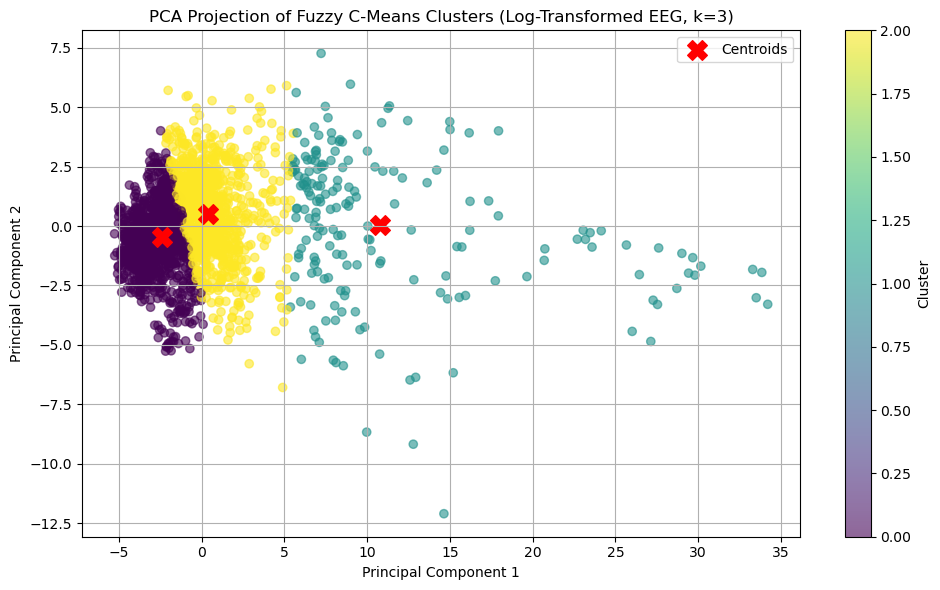

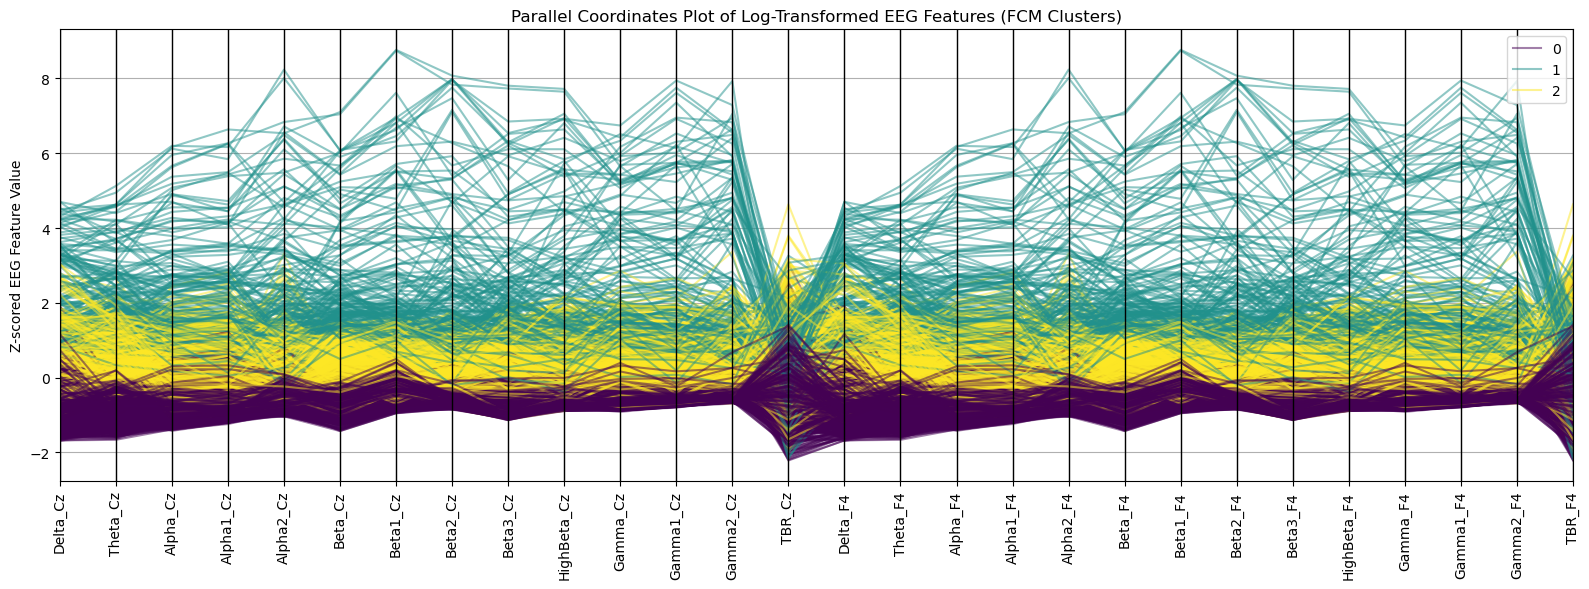

In [289]:
# Standardize log-transformed EEG features
scaler = StandardScaler()
eeg_scaled = scaler.fit_transform(eeg_data)

# Run Fuzzy C-Means clustering (k=3)

cntr, u, _, _, _, _, _ = fuzz.cluster.cmeans(
    data=eeg_scaled.T,   # transpose: shape (features × samples)
    c=3,                 # number of clusters
    m=2.0,               # fuzziness parameter
    error=0.001,
    maxiter=1000,
    seed=123
)

# Calculate Partition Entropy (PE)
def partition_entropy(u):
    return -np.mean(u * np.log(u + 1e-10))  # avoid log(0) with small epsilon

pe = partition_entropy(u)
print(f"Partition Entropy (PE): {pe:.4f}")

# assignment of cluster labels
labels_fcm = u.argmax(axis=0)  # shape (n_samples,)
eeg_data_clustered = eeg_data.copy()
eeg_data_clustered["FCM_Cluster"] = labels_fcm

# PCA for 2D visualization
pca = PCA(n_components=2)
pca_result = pca.fit_transform(eeg_scaled)
centroids_2d = pca.transform(cntr)

plt.figure(figsize=(10, 6))
scatter = plt.scatter(pca_result[:, 0], pca_result[:, 1],
                      c=labels_fcm, cmap='viridis', alpha=0.6)
plt.scatter(centroids_2d[:, 0], centroids_2d[:, 1],
            marker='X', s=200, c='red', label='Centroids')
plt.title("PCA Projection of Fuzzy C-Means Clusters (Log-Transformed EEG, k=3)")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.colorbar(scatter, label='Cluster')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Parallel Coordinates Plot
df_parallel = pd.DataFrame(eeg_scaled, columns=eeg_data.columns)
df_parallel["Cluster"] = labels_fcm.astype(str)

plt.figure(figsize=(16, 6))
parallel_coordinates(df_parallel, class_column="Cluster", colormap='viridis', alpha=0.5)
plt.title("Parallel Coordinates Plot of Log-Transformed EEG Features (FCM Clusters)")
plt.xticks(rotation=90)
plt.ylabel("Z-scored EEG Feature Value")
plt.grid(True)
plt.tight_layout()
plt.show()

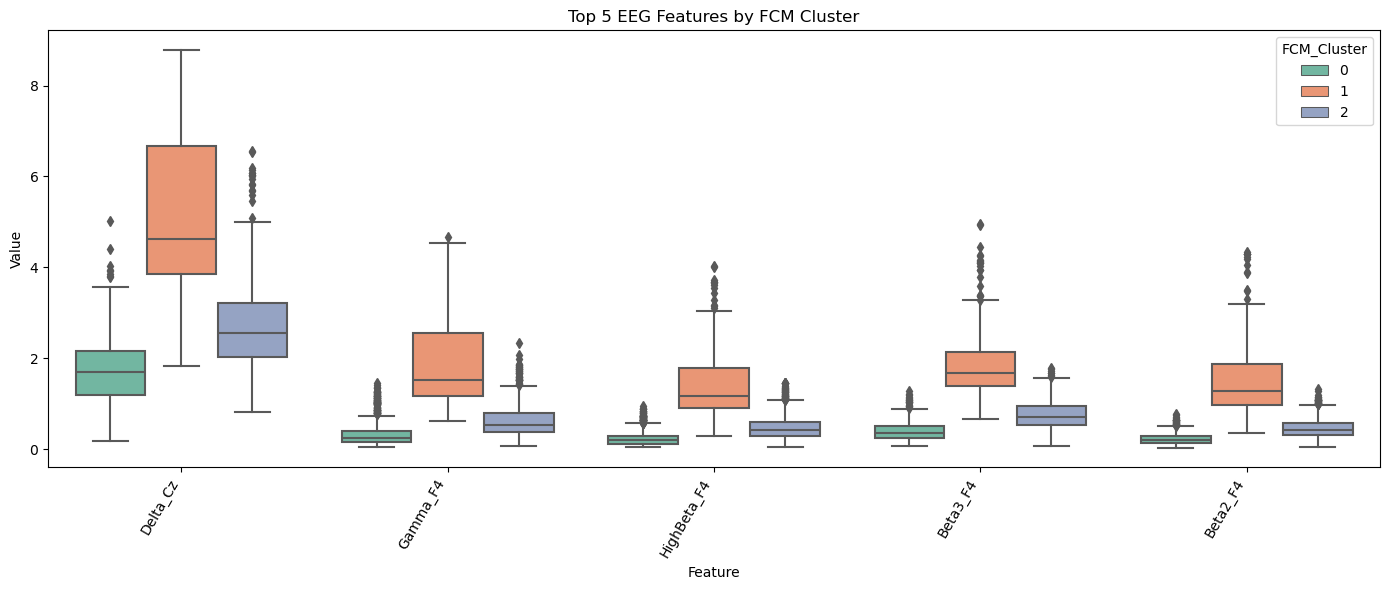

In [275]:
# Step 1: Attach FCM labels to EEG data
eeg_data_clustered = eeg_data.copy()
eeg_data_clustered['FCM_Cluster'] = labels_fcm

eeg_feature_cols = [col for col in eeg_data.columns if col != 'FCM_Cluster']


# Boxplots for Top N Features
top_n = 5
top_features = anova_df['Feature'].head(top_n)

eeg_long = pd.melt(
    eeg_data_clustered.reset_index(drop=True),
    id_vars='FCM_Cluster',
    value_vars=top_features,
    var_name='Feature',
    value_name='Value'
)

plt.figure(figsize=(14, 6))
sns.boxplot(x='Feature', y='Value', hue='FCM_Cluster', data=eeg_long, palette='Set2')
plt.title(f'Top {top_n} EEG Features by FCM Cluster')
plt.xticks(rotation=60, ha='right')
plt.tight_layout()
plt.show()

In [291]:
# Compute median values per cluster
cluster_medians = eeg_data_clustered.groupby('FCM_Cluster')[eeg_feature_cols].median()

# Top 5 features with the highest median values
top_n = 5
top_features_per_cluster_median = {}

for cluster in cluster_medians.index:
    top_features = cluster_medians.loc[cluster].sort_values(ascending=False).head(top_n)
    top_features_per_cluster_median[f'Cluster {cluster}'] = top_features

# Print results
for cluster, features in top_features_per_cluster_median.items():
    print(f"\n {cluster} — Top {top_n} Median Features:")
    print(features)


 Cluster 0 — Top 5 Median Features:
Delta_Cz    1.696450
Delta_F4    1.696450
TBR_Cz      1.101070
TBR_F4      1.101070
Theta_F4    1.088257
Name: 0, dtype: float64

 Cluster 1 — Top 5 Median Features:
Delta_Cz    4.624725
Delta_F4    4.624725
Theta_F4    3.808700
Theta_Cz    3.808700
Alpha_F4    2.405645
Name: 1, dtype: float64

 Cluster 2 — Top 5 Median Features:
Delta_Cz    2.548458
Delta_F4    2.548458
Theta_F4    2.097476
Theta_Cz    2.097476
TBR_Cz      1.459083
Name: 2, dtype: float64



Top EEG features by median difference across FCM clusters:
     Feature  Median_Diff
0   Delta_Cz     2.928274
1   Delta_F4     2.928274
2   Theta_F4     2.720443
3   Theta_Cz     2.720443
4   Alpha_F4     1.780959
5   Alpha_Cz     1.780959
6    Beta_F4     1.696684
7    Beta_Cz     1.696684
8  Alpha1_F4     1.680891
9  Alpha1_Cz     1.680891


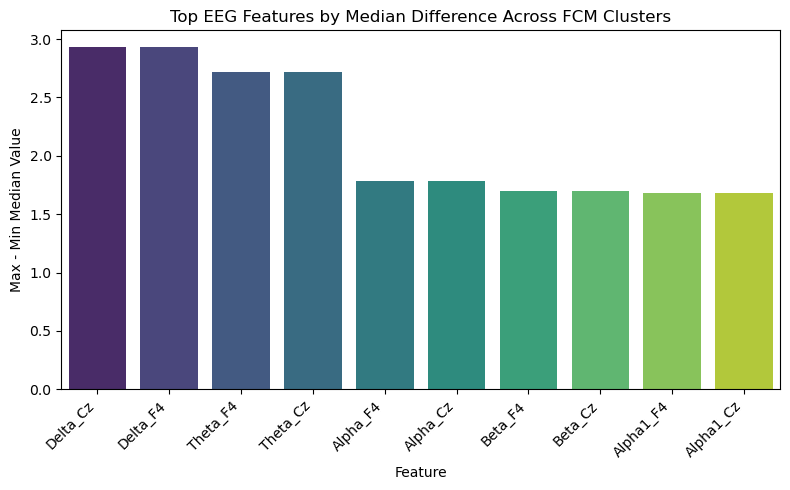

In [293]:
# Get cluster-wise medians
cluster_medians = eeg_data_clustered.groupby('FCM_Cluster')[eeg_feature_cols].median()

# Compute feature spread across clusters (max - min median)
feature_median_spread = (cluster_medians.max() - cluster_medians.min()).sort_values(ascending=False)

# Create a DataFrame for top features
top_n = 10
median_diff_df = pd.DataFrame({
    'Feature': feature_median_spread.index,
    'Median_Diff': feature_median_spread.values
}).head(top_n)

print("\nTop EEG features by median difference across FCM clusters:")
print(median_diff_df)

# Plot the result
plt.figure(figsize=(8, 5))
sns.barplot(data=median_diff_df, x='Feature', y='Median_Diff', palette='viridis')
plt.title('Top EEG Features by Median Difference Across FCM Clusters')
plt.ylabel('Max - Min Median Value')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


Top EEG features by Kruskal–Wallis p-value (non-parametric significance):
      Feature  H_statistic        p_value    -log10_p
28    Cluster  1812.971982   0.000000e+00  300.000000
1    Theta_Cz  1367.106557  1.369567e-297  296.863417
15   Theta_F4  1367.106557  1.369567e-297  296.863417
5     Beta_Cz  1335.064326  1.242983e-290  289.905535
19    Beta_F4  1335.064326  1.242983e-290  289.905535
2    Alpha_Cz  1288.481579  1.620989e-280  279.790220
16   Alpha_F4  1288.481579  1.620989e-280  279.790220
3   Alpha1_Cz  1174.257021  1.031164e-255  254.986672
17  Alpha1_F4  1174.257021  1.031164e-255  254.986672
20   Beta1_F4  1157.434272  4.638113e-252  251.333659


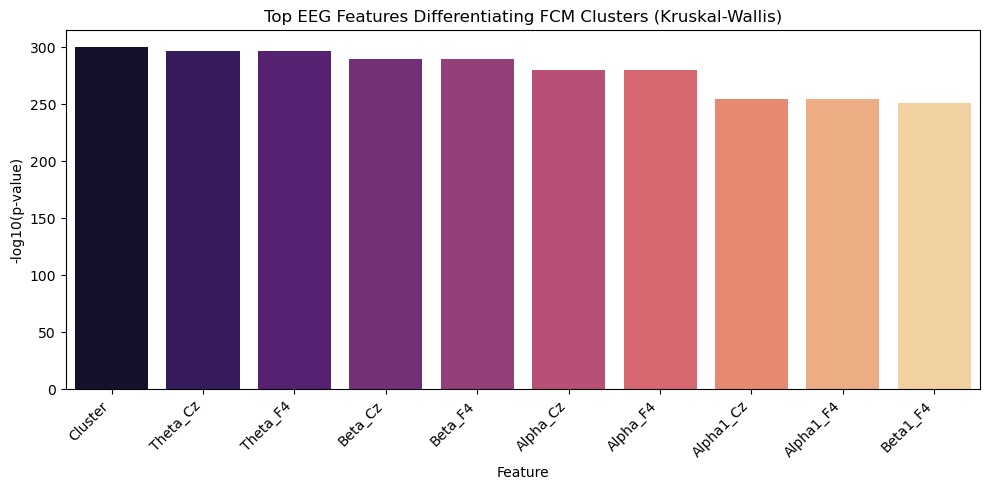

In [273]:
# Run Kruskal-Wallis test per EEG feature
kruskal_results = []
grouped = eeg_data_clustered.groupby('FCM_Cluster')

for feature in eeg_feature_cols:
    values = [group[feature].values for _, group in grouped]
    h_stat, p = kruskal(*values)
    kruskal_results.append((feature, h_stat, p))

# Create DataFrame with -log10(p) and sort
kruskal_df = pd.DataFrame(kruskal_results, columns=['Feature', 'H_statistic', 'p_value'])
kruskal_df['-log10_p'] = -np.log10(kruskal_df['p_value'].replace(0, 1e-300))
kruskal_df = kruskal_df.sort_values('p_value')

# Display top significant features
print("\nTop EEG features by Kruskal–Wallis p-value (non-parametric significance):")
print(kruskal_df.head(10))

# Plot
plt.figure(figsize=(10, 5))
sns.barplot(data=kruskal_df.head(10), x='Feature', y='-log10_p', palette='magma')
plt.title('Top EEG Features Differentiating FCM Clusters (Kruskal-Wallis)')
plt.ylabel('-log10(p-value)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

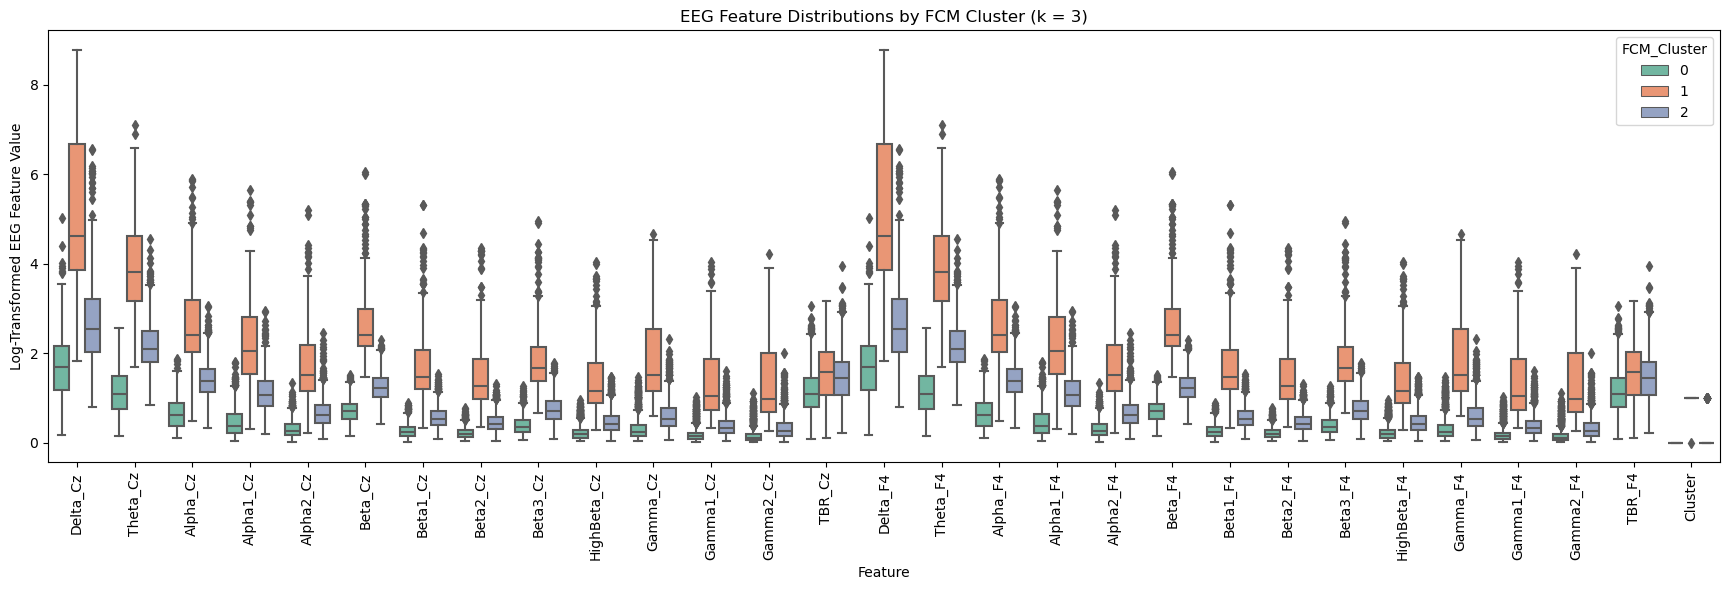

In [295]:
# Define feature columns (excluding cluster label)
eeg_feature_cols = [col for col in eeg_data.columns if col != 'FCM_Cluster']

# Melt data for plotting
eeg_long = pd.melt(
    eeg_data_clustered.reset_index(drop=True),
    id_vars='FCM_Cluster',
    value_vars=eeg_feature_cols,
    var_name='Feature',
    value_name='Value'
)

# Create boxplot
plt.figure(figsize=(len(eeg_feature_cols) * 0.6, 6))  # dynamically adjust width
sns.boxplot(x='Feature', y='Value', hue='FCM_Cluster', data=eeg_long, palette='Set2')
plt.title('EEG Feature Distributions by FCM Cluster (k = 3)')
plt.xticks(rotation=90)
plt.ylabel('Log-Transformed EEG Feature Value')
plt.tight_layout()
plt.show()


# Membership scores

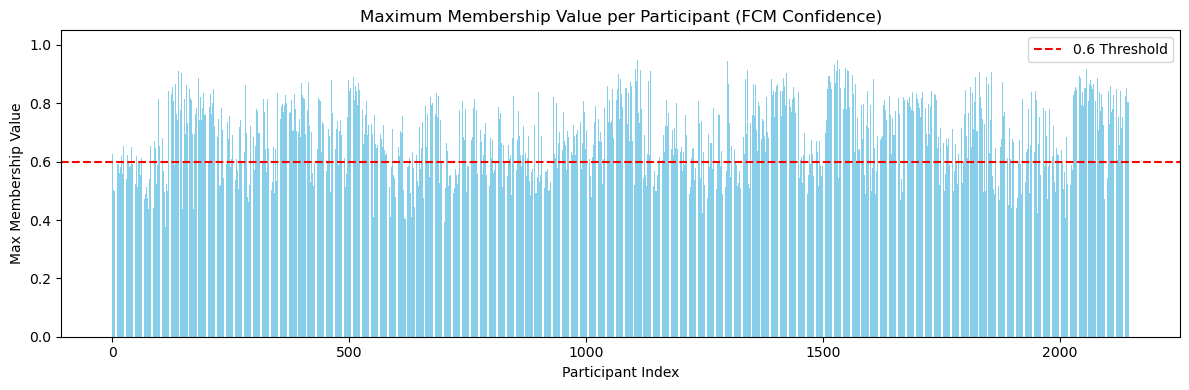

In [299]:
# Compute the max membership per participant
max_membership = u.max(axis=0)  # shape = (n_samples,)
participant_idx = np.arange(len(max_membership))

# Plot
plt.figure(figsize=(12, 4))
plt.bar(participant_idx, max_membership, color='skyblue')
plt.axhline(y=0.6, color='red', linestyle='--', label='0.6 Threshold')
plt.title('Maximum Membership Value per Participant (FCM Confidence)')
plt.xlabel('Participant Index')
plt.ylabel('Max Membership Value')
plt.ylim(0, 1.05)
plt.tight_layout()
plt.legend()
plt.show()


# Fuzzy c-means k = 3 with PCA

PCA reduced dimensions from 28 to 3 components


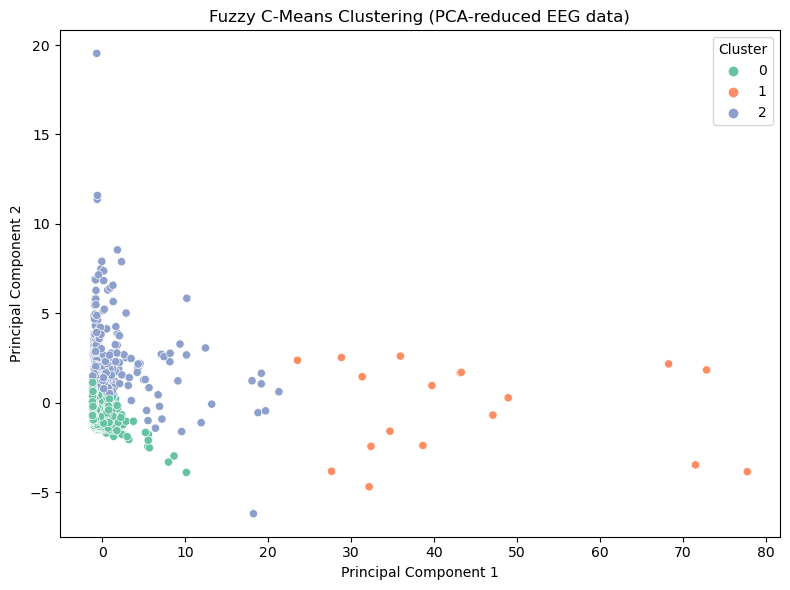

Partition Entropy (PE): 0.2824


In [24]:
# Standardize EEG data
scaler = StandardScaler()
eeg_scaled = scaler.fit_transform(eeg_data)  # assuming eeg_data is your raw feature DataFrame

# Apply PCA to retain 85% variance
pca = PCA(n_components=0.85, random_state=42)
eeg_pca = pca.fit_transform(eeg_scaled)

print(f"PCA reduced dimensions from {eeg_data.shape[1]} to {eeg_pca.shape[1]} components")

#  Transpose 
eeg_pca_T = eeg_pca.T  # shape required by skfuzzy: features × samples

# Run Fuzzy C-Means
cntr, u, _, _, _, _, _ = fuzz.cluster.cmeans(
    data=eeg_pca_T,
    c=3,              # number of clusters
    m=2.0,            # fuzziness parameter
    error=0.001,      # convergence threshold
    maxiter=1000,     # max iterations
    seed=123
)

#  Assign clusters by max membership
final_labels = np.argmax(u, axis=0)

# Attach cluster labels to PCA-reduced data
pca_df = pd.DataFrame(eeg_pca, columns=[f'PC{i+1}' for i in range(eeg_pca.shape[1])])
pca_df['Cluster'] = final_labels

#  Visualize PCA components colored by cluster
plt.figure(figsize=(8, 6))
sns.scatterplot(data=pca_df, x='PC1', y='PC2', hue='Cluster', palette='Set2')
plt.title('Fuzzy C-Means Clustering (PCA-reduced EEG data)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Cluster')
plt.tight_layout()
plt.show()

# Partition entropy
partition_entropy = -np.sum(u * np.log(u + 1e-10)) / u.shape[1]
print(f"Partition Entropy (PE): {partition_entropy:.4f}")

# Attach to original data 
eeg_data_clustered = eeg_data.copy()
eeg_data_clustered['Cluster_FCM_PCA'] = final_labels


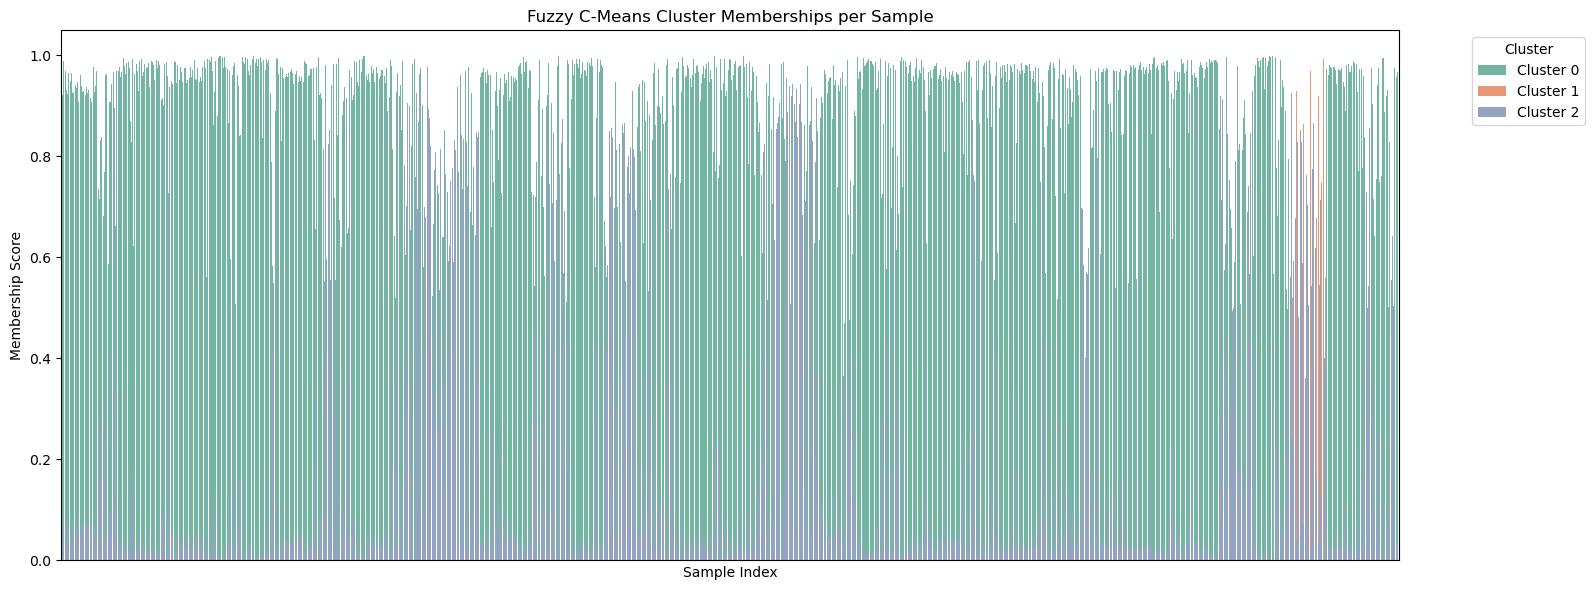

In [28]:
# Membership scores

# Step 1: Convert membership matrix `u` to DataFrame (samples × clusters)
membership_df = pd.DataFrame(u.T, columns=[f'Cluster {i}' for i in range(u.shape[0])])
membership_df['Sample'] = membership_df.index

# Step 2: Melt to long format for stacked bar plot
membership_long = membership_df.melt(id_vars='Sample', 
                                      var_name='Cluster', 
                                      value_name='Membership')

# Step 3: Bar plot
plt.figure(figsize=(16, 6))
sns.barplot(data=membership_long, 
            x='Sample', 
            y='Membership', 
            hue='Cluster', 
            dodge=False,  # stacked bars
            palette='Set2')

plt.title('Fuzzy C-Means Cluster Memberships per Sample')
plt.xlabel('Sample Index')
plt.ylabel('Membership Score')
plt.xticks([], [])  # remove x-tick labels if too many samples
plt.legend(title='Cluster', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


In [30]:
# number of subjects per cluster 

# Assign each subject to the cluster with highest membership
final_labels = np.argmax(u, axis=0)

# Count how many subjects are in each cluster
import pandas as pd
cluster_counts = pd.Series(final_labels).value_counts().sort_index()

# Display counts
for cluster_id, count in cluster_counts.items():
    print(f"Cluster {cluster_id}: {count} subjects")


Cluster 0: 1781 subjects
Cluster 1: 18 subjects
Cluster 2: 347 subjects


# Fuzzy c means k = 2

Partition Entropy (PE): 0.1619


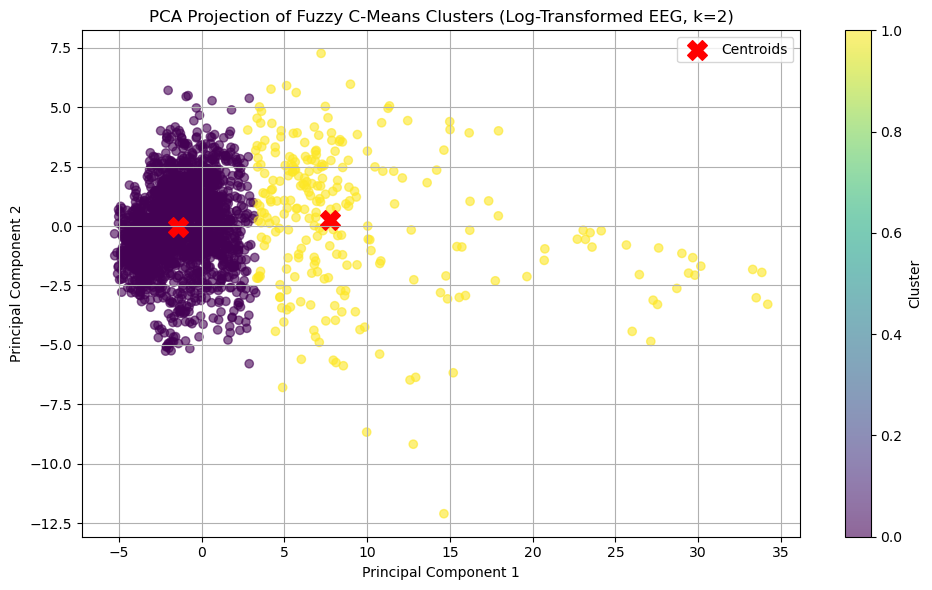

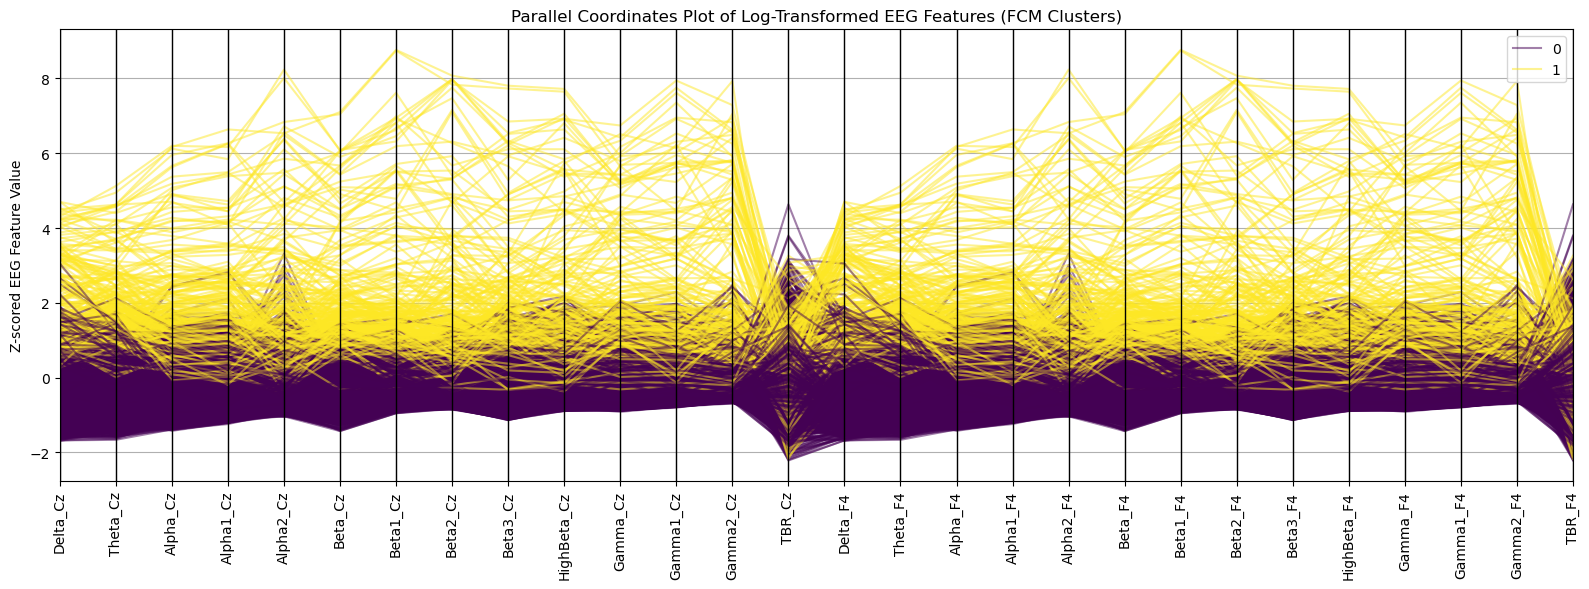

In [301]:
# Standardize log-transformed EEG features
scaler = StandardScaler()
eeg_scaled = scaler.fit_transform(eeg_data)

# Run Fuzzy C-Means clustering (k=3)

cntr, u, _, _, _, _, _ = fuzz.cluster.cmeans(
    data=eeg_scaled.T,   # transpose: shape (features × samples)
    c=2,                 # number of clusters
    m=2.0,               # fuzziness parameter
    error=0.001,
    maxiter=1000,
    seed=123
)

# Calculate Partition Entropy (PE)
def partition_entropy(u):
    return -np.mean(u * np.log(u + 1e-10))  # avoid log(0) with small epsilon

pe = partition_entropy(u)
print(f"Partition Entropy (PE): {pe:.4f}")

# Hard assignment of cluster labels
labels_fcm = u.argmax(axis=0)  # shape (n_samples,)
eeg_data_clustered = eeg_data.copy()
eeg_data_clustered["FCM_Cluster"] = labels_fcm

# PCA for 2D visualization
pca = PCA(n_components=2)
pca_result = pca.fit_transform(eeg_scaled)
centroids_2d = pca.transform(cntr)

plt.figure(figsize=(10, 6))
scatter = plt.scatter(pca_result[:, 0], pca_result[:, 1],
                      c=labels_fcm, cmap='viridis', alpha=0.6)
plt.scatter(centroids_2d[:, 0], centroids_2d[:, 1],
            marker='X', s=200, c='red', label='Centroids')
plt.title("PCA Projection of Fuzzy C-Means Clusters (Log-Transformed EEG, k=2)")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.colorbar(scatter, label='Cluster')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Parallel Coordinates Plot
df_parallel = pd.DataFrame(eeg_scaled, columns=eeg_data.columns)
df_parallel["Cluster"] = labels_fcm.astype(str)

plt.figure(figsize=(16, 6))
parallel_coordinates(df_parallel, class_column="Cluster", colormap='viridis', alpha=0.5)
plt.title("Parallel Coordinates Plot of Log-Transformed EEG Features (FCM Clusters)")
plt.xticks(rotation=90)
plt.ylabel("Z-scored EEG Feature Value")
plt.grid(True)
plt.tight_layout()
plt.show()

In [307]:
# Get the list of EEG features (exclude cluster label)
eeg_feature_cols = [col for col in eeg_data.columns if col != "FCM_Cluster"]

# Compute median EEG feature values per cluster
cluster_medians = eeg_data_clustered.groupby('FCM_Cluster')[eeg_feature_cols].median()

# For each cluster, extract top N features with highest median values
top_n = 5
top_features_per_cluster_median = {}

for cluster in cluster_medians.index:
    top_features = cluster_medians.loc[cluster].sort_values(ascending=False).head(top_n)
    top_features_per_cluster_median[f'Cluster {cluster}'] = top_features

# Print results
for cluster, features in top_features_per_cluster_median.items():
    print(f"\n {cluster} — Top {top_n} Median EEG Features:")
    print(features)



 Cluster 0 — Top 5 Median EEG Features:
Delta_Cz    2.048620
Delta_F4    2.048620
Theta_F4    1.598108
Theta_Cz    1.598108
TBR_Cz      1.256076
Name: 0, dtype: float64

 Cluster 1 — Top 5 Median EEG Features:
Delta_Cz    4.433804
Delta_F4    4.433804
Theta_F4    3.525833
Theta_Cz    3.525833
Alpha_F4    2.245796
Name: 1, dtype: float64


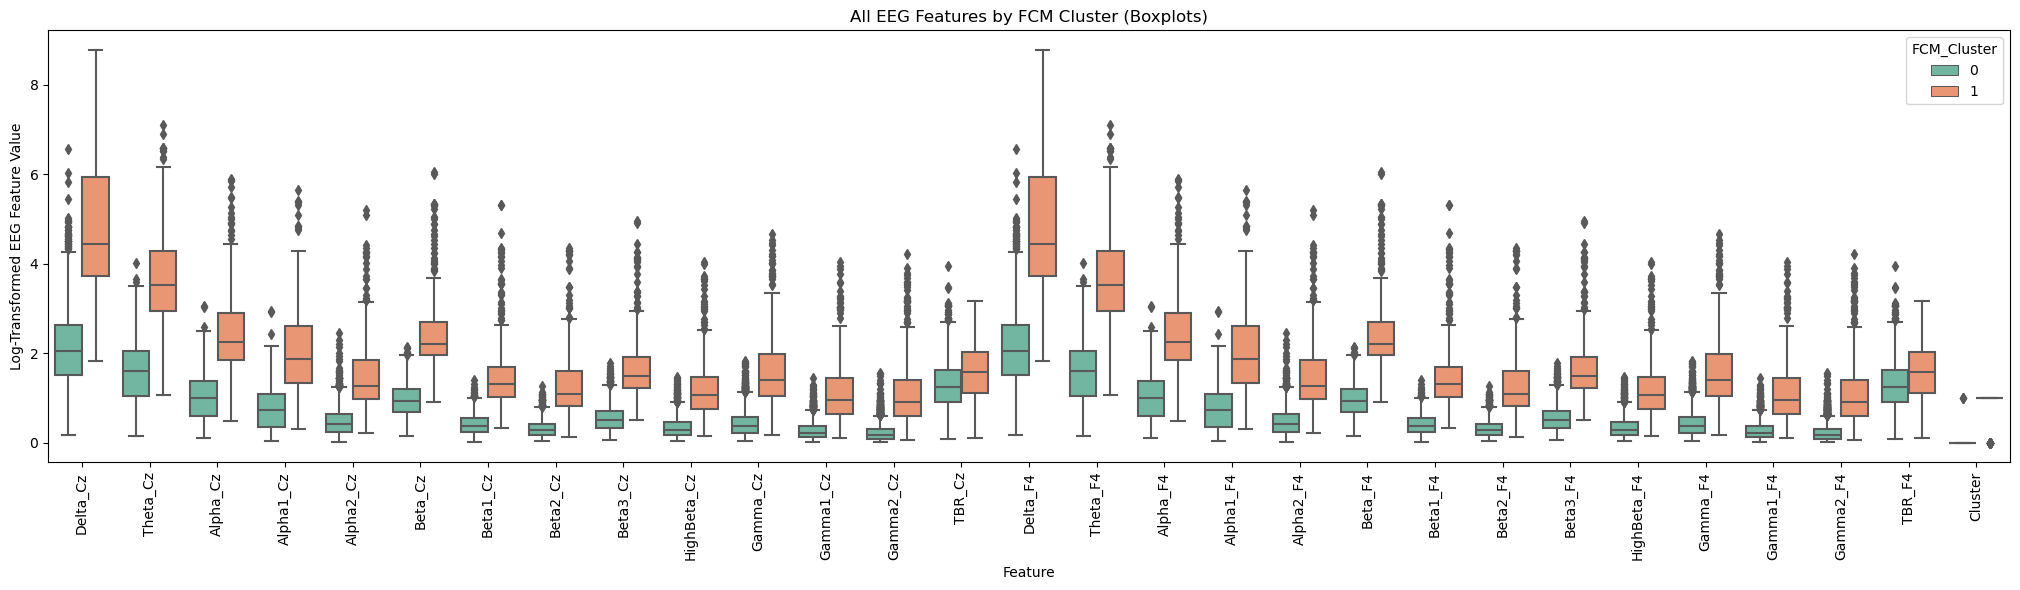

In [287]:
# Extract all EEG feature names
eeg_feature_cols = [col for col in eeg_data_clustered.columns if col != 'FCM_Cluster']

# Melt the dataset for plotting
eeg_long_all = pd.melt(
    eeg_data_clustered.reset_index(drop=True),
    id_vars='FCM_Cluster',
    value_vars=eeg_feature_cols,
    var_name='Feature',
    value_name='Value'
)

# Plot all features (in a wide scrollable figure)
plt.figure(figsize=(len(eeg_feature_cols) * 0.7, 6))
sns.boxplot(x='Feature', y='Value', hue='FCM_Cluster', data=eeg_long_all, palette='Set2')
plt.title('All EEG Features by FCM Cluster (Boxplots)')
plt.ylabel('Log-Transformed EEG Feature Value')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

# Membership scores

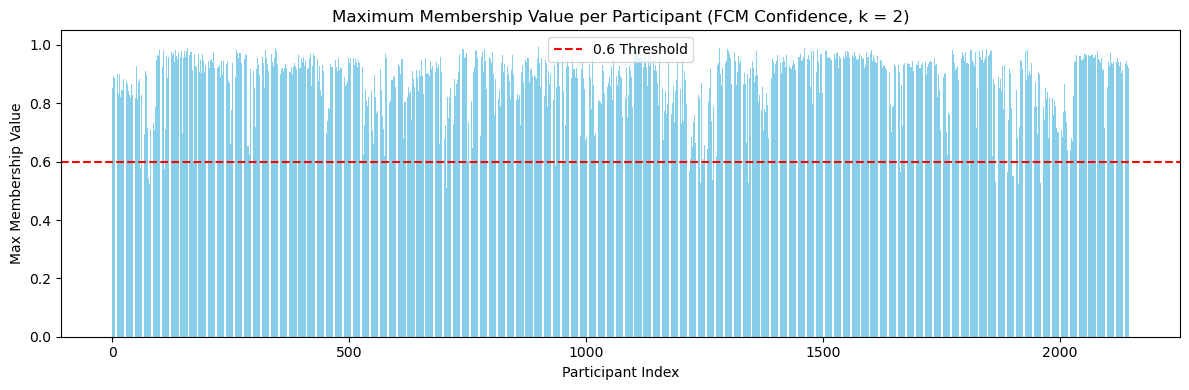

In [305]:
# Get max membership value per participant
max_membership_k2 = u.max(axis=0)  # shape = (n_samples,)
participant_idx_k2 = np.arange(len(max_membership_k2))

# Step 2: Plot
plt.figure(figsize=(12, 4))
plt.bar(participant_idx_k2, max_membership_k2, color='skyblue')
plt.axhline(y=0.6, color='red', linestyle='--', label='0.6 Threshold')
plt.title('Maximum Membership Value per Participant (FCM Confidence, k = 2)')
plt.xlabel('Participant Index')
plt.ylabel('Max Membership Value')
plt.ylim(0, 1.05)
plt.legend()
plt.tight_layout()
plt.show()

# The BRAINHACK DATASET Analysis (augmented) 

In [5]:
# Loading the BRAINHACK DATASET and removing the labels
eeg_labeled = pd.read_csv('/Users/niyaneykova/Desktop/MasterThesis/augmented_EEG_Brainhack.csv')
eeg_labeled.head()

id  Gender  Delta_FP1  Beta2_Pz  Beta2_P3  Beta2_T5  Beta2_T4  Beta2_C4  \
0   1       1  15.376173  1.870920  1.690150  1.138450  2.171898  1.671639   
1   3       1   9.616079  3.687364  3.309108  2.179566  1.457013  2.633912   
2   4       1  12.565857  4.072874  3.534234  3.073279  1.450251  1.868878   
3   7       1  21.037374  2.025078  1.914646  1.760767  1.803665  1.679005   
4  11       1  21.032859  2.081850  2.547563  2.095859  2.259752  2.134702   

   Beta2_Cz  Beta2_C3  ...   Delta_F4   Delta_F8   Delta_F3   Delta_C3  \
0  1.961882  1.922789  ...  10.679267   7.025115   9.749313   9.092750   
1  3.378756  2.425733  ...  12.054744   6.404345  12.078978  12.858391   
2  1.989654  2.042113  ...  14.865343   8.362874  14.349415  13.461806   
3  1.894624  1.671052  ...  13.614431  10.393644  13.387393  11.542320   
4  1.961976  2.050003  ...  18.640376  11.670006  18.657539  18.563134   

    Delta_Cz   Delta_C4  Delta_T4  Delta_T3  adhdtype  subtype  
0  10.148974   8.490908  4.106517  5.149450         2      NaN  
1  16.542007   9.330179  3.870175  5.225333         2      NaN  
2  18.871127  13.790890  6.693292  8.777742         1      NaN  
3  14.620908  10.687557  6.036227  6.704593         1      NaN  
4  22.177739  16.449590  7.640097  9.356260         2      NaN  

[5 rows x 213 columns]

In [3]:
# Libraries
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
from pandas.plotting import parallel_coordinates
import seaborn as sns
from scipy.stats import kruskal
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.datasets import make_blobs
import skfuzzy as fuzz
from sklearn.metrics import adjusted_rand_score, confusion_matrix

# Random seed
np.random.seed(123)

# Log-transform 

In [7]:
# Separate EEG features and labels
# Drop metadata columns, keep only EEG features
eeg_features = eeg_labeled.drop(columns=['id', 'subtype', 'Gender', 'adhdtype'])
eeg_feature_names = eeg_features.columns 
true_labels = eeg_labeled['subtype']

# Log-transform with log1p (handles zeros safely)
eeg_logged = np.log1p(eeg_features)

# Replace EEG features in the original dataframe
eeg_logged_full = eeg_labeled.copy()
eeg_logged_full[eeg_feature_names] = eeg_logged

In [364]:
eeg_logged_full.describe()

id      Gender   Delta_FP1    Beta2_Pz    Beta2_P3    Beta2_T5  \
count  116.000000  116.000000  116.000000  116.000000  116.000000  116.000000   
mean   256.241379    1.508621    2.758693    1.296455    1.204780    1.049400   
std    264.102109    0.502095    0.463864    0.422675    0.382162    0.373642   
min      1.000000    1.000000    1.623927    0.404788    0.396247    0.309877   
25%     49.750000    1.000000    2.534794    0.989017    0.935032    0.794602   
50%     98.500000    2.000000    2.663996    1.333229    1.232993    1.001828   
75%    411.250000    2.000000    3.008187    1.490537    1.430683    1.188641   
max    722.000000    2.000000    4.437978    2.702160    2.468792    2.573862   

         Beta2_T4    Beta2_C4    Beta2_Cz    Beta2_C3  ...    Delta_Fz  \
count  116.000000  116.000000  116.000000  116.000000  ...  116.000000   
mean     1.147381    1.130946    1.169475    1.118086  ...    2.783544   
std      0.490810    0.388228    0.375355    0.371282  ...    0.342132   
min      0.383588    0.324723    0.407522    0.387869  ...    1.750263   
25%      0.765606    0.828749    0.900244    0.822807  ...    2.604038   
50%      1.131393    1.131203    1.162054    1.121356  ...    2.846169   
75%      1.430938    1.328557    1.414974    1.324481  ...    2.960281   
max      3.126521    2.251436    2.402558    2.097570  ...    3.525718   

         Delta_F4    Delta_F8    Delta_F3    Delta_C3    Delta_Cz    Delta_C4  \
count  116.000000  116.000000  116.000000  116.000000  116.000000  116.000000   
mean     2.692421    2.315229    2.672044    2.585916    2.855744    2.593869   
std      0.331302    0.338559    0.334285    0.331218    0.331803    0.344771   
min      1.697855    1.533242    1.677638    1.685130    1.877808    1.613204   
25%      2.513224    2.178597    2.500596    2.394585    2.629265    2.362902   
50%      2.766221    2.368404    2.692745    2.629776    2.928084    2.662927   
75%      2.884059    2.430777    2.876382    2.809013    3.033662    2.770757   
max      3.378102    3.289638    3.441700    3.342580    3.537034    3.249687   

         Delta_T4    Delta_T3    adhdtype  
count  116.000000  116.000000  116.000000  
mean     2.019698    2.005790    1.206897  
std      0.326690    0.301838    0.740355  
min      1.216310    1.212898    0.000000  
25%      1.826831    1.830134    1.000000  
50%      2.074463    1.965269    1.000000  
75%      2.153683    2.204080    2.000000  
max      3.056145    2.788804    2.000000  

[8 rows x 212 columns]

In [9]:
# Define outliers — any row with 0.0 or 1.0 in any feature
outlier_mask = ((eeg_logged == 0.0) | (eeg_logged == 1.0)).any(axis=1)

# Remove outliers from both data and labels
eeg_logged_clean = eeg_logged[~outlier_mask].reset_index(drop=True)
eeg_labeled_clean = eeg_labeled[~outlier_mask].reset_index(drop=True)

# Confirm how many rows were removed
print(f" Outliers removed: {outlier_mask.sum()}")
print(f" Remaining participants: {len(eeg_logged_clean)}")

 Outliers removed: 0
 Remaining participants: 116


# Correlations

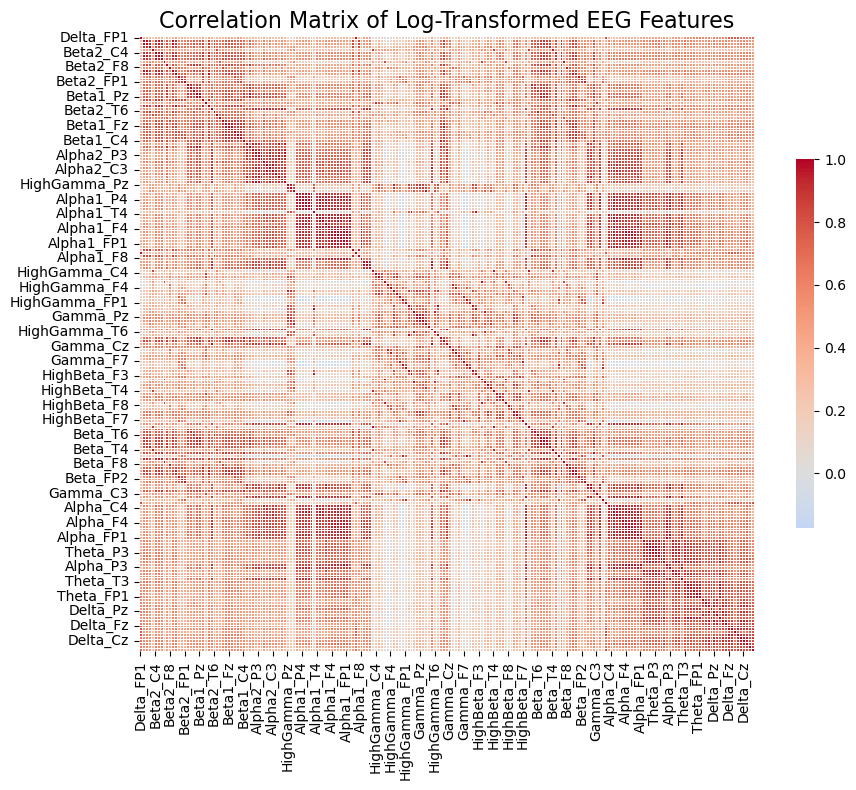

In [27]:
# correlation matrix on logged EEG features
corr_matrix = eeg_logged_clean[eeg_feature_names].corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, cmap='coolwarm', center=0,
            square=True, linewidths=0.5, cbar_kws={'shrink': 0.6})
plt.title('Correlation Matrix of Log-Transformed EEG Features', fontsize=16)
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


# Data distribution

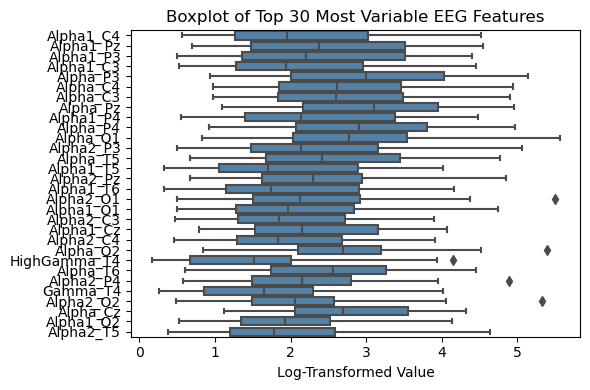

In [33]:
# top 30 most variable features
top_vars = eeg_logged_clean[eeg_feature_names].var().sort_values(ascending=False).head(30).index

plt.figure(figsize=(6, 4))
sns.boxplot(data=eeg_logged_full[top_vars], orient='h', color='steelblue')
plt.title('Boxplot of Top 30 Most Variable EEG Features')
plt.xlabel('Log-Transformed Value')
plt.tight_layout()
plt.show()


# Hierarchical Clustering Model

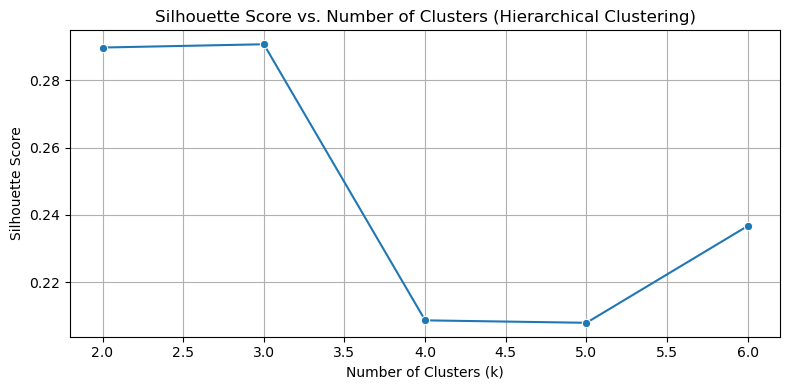

Best number of clusters: k = 3 (Silhouette Score = 0.291)


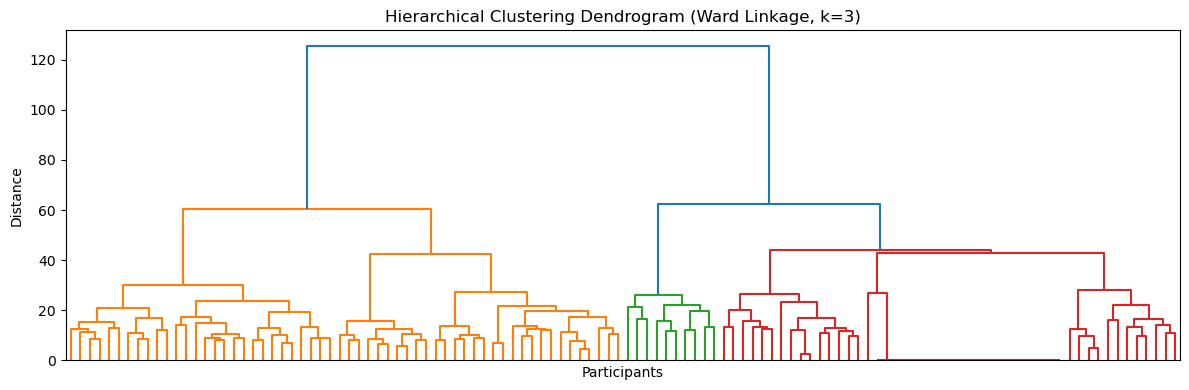

In [11]:
np.random.seed(123)
# Standardize log-transformed EEG features
eeg_feature_names = [col for col in eeg_logged_full.columns if col not in ['id', 'subtype', 'Gender', 'adhdtype']]
eeg_profiled = StandardScaler().fit_transform(eeg_logged_clean[eeg_feature_names])

# Silhouette analysis to find optimal k
silhouette_scores = []
k_range = range(2, 7)

for k in k_range:
    model = AgglomerativeClustering(n_clusters=k, linkage='ward')
    labels = model.fit_predict(eeg_profiled)
    score = silhouette_score(eeg_profiled, labels)
    silhouette_scores.append(score)

# Fit final model with best k
best_k = k_range[np.argmax(silhouette_scores)]
final_model = AgglomerativeClustering(n_clusters=best_k, linkage='ward')
cluster_labels = final_model.fit_predict(eeg_profiled)

# Save cluster labels to original dataframe
eeg_labeled['Hierarchical_Cluster'] = cluster_labels

# Silhouette Score Plot
plt.figure(figsize=(8, 4))
sns.lineplot(x=list(k_range), y=silhouette_scores, marker='o')
plt.title("Silhouette Score vs. Number of Clusters (Hierarchical Clustering)")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Silhouette Score")
plt.grid(True)
plt.tight_layout()
plt.show()

print(f"Best number of clusters: k = {best_k} (Silhouette Score = {max(silhouette_scores):.3f})")

from scipy.cluster.hierarchy import linkage, dendrogram, fcluster

# Compute linkage matrix
linkage_matrix = linkage(eeg_profiled, method='ward')

# Determine threshold to split into k clusters (best_k = 3)
threshold = linkage_matrix[-(best_k - 1), 2]

# Step 3: Plot dendrogram with proper cluster coloring
plt.figure(figsize=(12, 4))
dendrogram(linkage_matrix, no_labels=True, color_threshold=threshold)
plt.title(f'Hierarchical Clustering Dendrogram (Ward Linkage, k={best_k})')
plt.xlabel('Participants')
plt.ylabel('Distance')
plt.tight_layout()
plt.show()


# Within-cluster analysis

In [36]:

# Number of participants per cluster
cluster_counts = eeg_labeled_clean['Hierarchical_Cluster'].value_counts().sort_index()
print("\n Number of participants per cluster:")
print(cluster_counts)

# Top median EEG features per cluster
top_n = 5
top_features_per_cluster = {}

# Get medians per cluster
cluster_medians = eeg_logged_clean.copy()
cluster_medians['Cluster'] = cluster_labels
grouped_medians = cluster_medians.groupby('Cluster')[eeg_feature_names].median()

# Extract top N per cluster
for cluster_id in grouped_medians.index:
    top_feats = grouped_medians.loc[cluster_id].sort_values(ascending=False).head(top_n)
    top_features_per_cluster[f"Cluster {cluster_id}"] = top_feats

# Print Top Features
for cluster_name, features in top_features_per_cluster.items():
    print(f"\n {cluster_name} — Top {top_n} Median EEG Features:")
    print(features)



 Number of participants per cluster:
Hierarchical_Cluster
0    58
1    48
2    10
Name: count, dtype: int64

 Cluster 0 — Top 5 Median EEG Features:
Delta_Fz     2.701324
Delta_Cz     2.683802
Delta_FP2    2.675739
Delta_Pz     2.641320
Delta_FP1    2.632646
Name: 0, dtype: float64

 Cluster 1 — Top 5 Median EEG Features:
Alpha_P3    4.035130
Alpha_Pz    3.946814
Alpha_C3    3.817456
Alpha_P4    3.808466
Alpha_C4    3.695951
Name: 1, dtype: float64

 Cluster 2 — Top 5 Median EEG Features:
Beta_T4     3.618847
Beta_O1     3.161887
Gamma_T4    3.123224
Beta_T6     3.112709
Beta_O2     3.027781
Name: 2, dtype: float64


In [46]:
kruskal_results = []

# Grouped data
grouped = eeg_labeled_clean.groupby('Hierarchical_Cluster')

# KW for each feature
for feature in eeg_feature_names:
    values = [group[feature].values for _, group in grouped]
    h_stat, p_val = kruskal(*values)
    kruskal_results.append((feature, h_stat, p_val))

# Create results dataframe
kw_df = pd.DataFrame(kruskal_results, columns=['Feature', 'H_statistic', 'p_value'])
kw_df['-log10_p'] = -np.log10(kw_df['p_value'].replace(0, 1e-300))
kw_df = kw_df.sort_values('p_value')

# Show top 10 most significant features
print("\nTop EEG Features by Kruskal–Wallis p-value:")
print(kw_df.head(10))


Top EEG Features by Kruskal–Wallis p-value:
       Feature  H_statistic       p_value   -log10_p
159   Alpha_T4    86.487411  1.657667e-19  18.780503
54   Alpha1_T6    86.294165  1.825830e-19  18.738540
64   Alpha1_T3    86.236821  1.878938e-19  18.726088
163   Alpha_T3    85.858091  2.270661e-19  18.643848
131   Alpha_T6    85.797467  2.340543e-19  18.630683
60   Alpha1_T4    84.995732  3.494711e-19  18.456589
161   Alpha_Cz    84.920865  3.628009e-19  18.440332
160   Alpha_C4    84.217412  5.157288e-19  18.287579
68   Alpha1_F7    84.212162  5.170842e-19  18.286439
162   Alpha_C3    83.605714  7.002447e-19  18.154750


# Fuzzy c-means k = 3

In [187]:
np.random.seed(123)

# Step 1: Re-standardize EEG features
eeg_feature_names = [col for col in eeg_logged_clean.columns
                     if col not in ['id', 'subtype', 'adhdtype', 'FCM_Cluster', 'Hierarchical_Cluster']]
X = eeg_logged_clean[eeg_feature_names].select_dtypes(include=[np.number])
X_scaled = StandardScaler().fit_transform(X)

# Step 2: Fuzzy C-Means clustering (k = 3)
data_T = X_scaled.T
n_clusters = 3

cntr, u, _, _, _, _, _ = fuzz.cluster.cmeans(
    data=data_T,
    c=n_clusters,
    m=2.0,
    error=0.001,
    maxiter=1000,
    seed=123
)

# Step 3: Assign hard labels from highest membership
labels_fcm = u.argmax(axis=0)
eeg_logged_clean['FCM_Clusterr'] = labels_fcm

def compute_partition_entropy(u):
    u_safe = np.clip(u, 1e-10, 1.0)
    return -np.sum(u_safe * np.log(u_safe)) / u.shape[1]

pe = compute_partition_entropy(u)
print(f"Partition Entropy (PE): {pe:.4f}")

Partition Entropy (PE): 0.8698


In [197]:
# Step 7: Count participants per cluster
cluster_counts = eeg_logged_clean['FCM_Clusterr'].value_counts().sort_index()

print("\n Number of participants per FCM cluster:")
print(cluster_counts)


 Number of participants per FCM cluster:
FCM_Clusterr
0    39
1    38
2    39
Name: count, dtype: int64


In [ ]:
# FCM K = 3 doesn't perform well based on the PE so within-cluster analysis is retained

# Fuzzy c-Means k = 2

/opt/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(


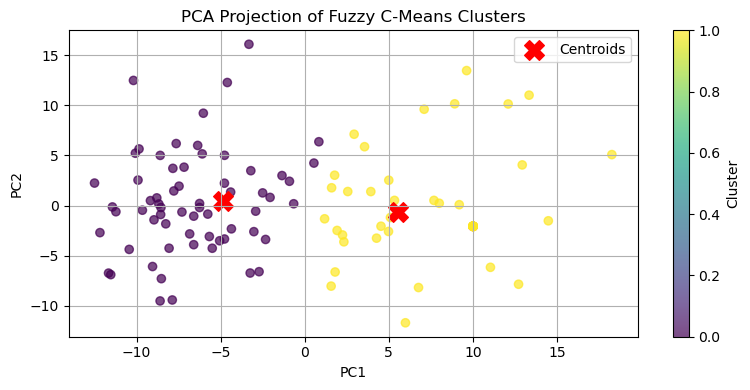

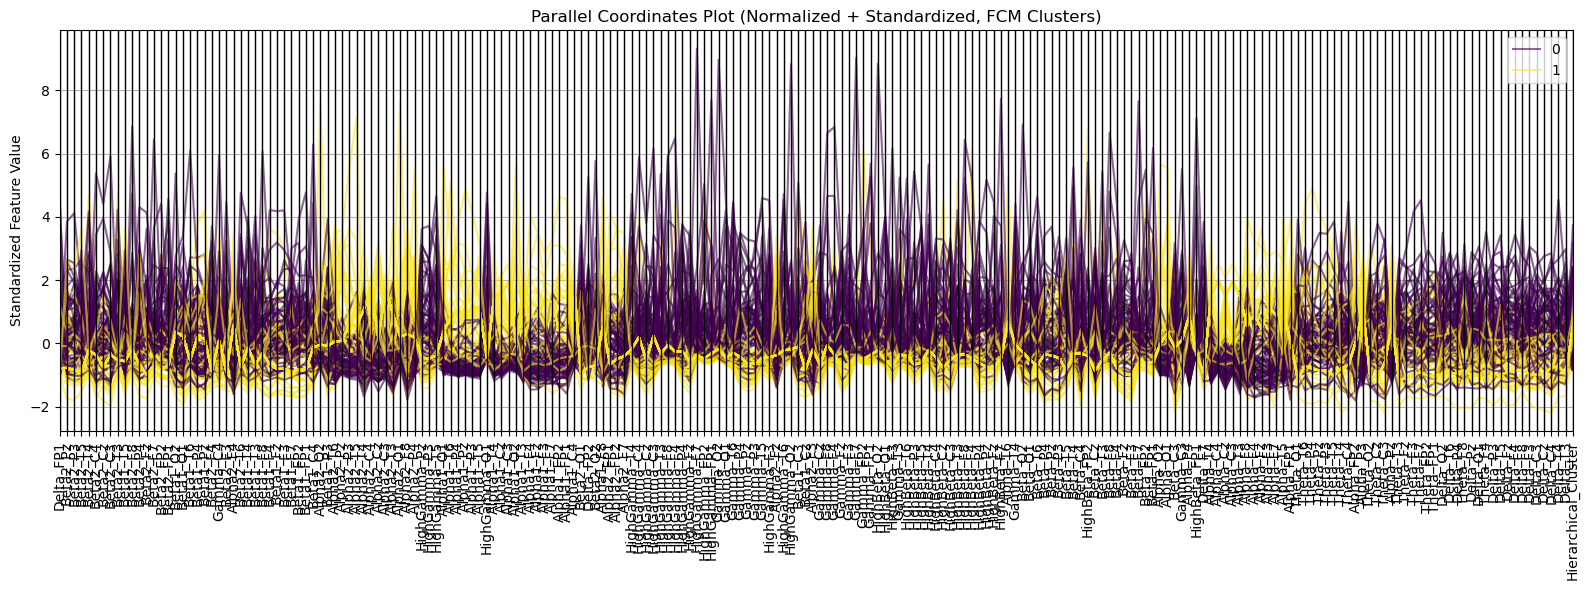

Partition Entropy (PE): 0.5933


In [195]:
# Set seed
np.random.seed(123)

# Load EEG features and exclude metadadta
eeg_features = eeg_labeled.drop(columns=['id', 'subtype', 'Gender', 'adhdtype'])

# Normalize per participant (row-wise)
eeg_relative = eeg_features.div(eeg_features.sum(axis=1), axis=0)

# Standardize per feature (column-wise)
scaler = StandardScaler()
eeg_scaled = pd.DataFrame(
    scaler.fit_transform(eeg_relative),
    columns=eeg_relative.columns,
    index=eeg_relative.index
)

# Fuzzy C-Means (transpose to shape: features x samples)
data = eeg_scaled.T.values
n_clusters = 2

cntr, u, _, _, _, _, _ = fuzz.cluster.cmeans(
    data=data,
    c=n_clusters,
    m=2.0,
    error=0.001,
    maxiter=1000,
    seed=123
)

# Assign hard cluster labels (highest membership)
labels_fcm = u.argmax(axis=0)
eeg_labeled['FCM_Cluster'] = labels_fcm

# PCA (just for visualization)
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
reduced = pca.fit_transform(eeg_scaled)
centroids_2d = pca.transform(cntr)

plt.figure(figsize=(8, 4))
scatter = plt.scatter(reduced[:, 0], reduced[:, 1],
                      c=labels_fcm, cmap='viridis', alpha=0.7)
plt.scatter(centroids_2d[:, 0], centroids_2d[:, 1],
            marker='X', s=200, c='red', label='Centroids')
plt.title("PCA Projection of Fuzzy C-Means Clusters")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.colorbar(scatter, label='Cluster')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Parallel Coordinates Plot
eeg_scaled['Cluster'] = labels_fcm.astype(str)
plt.figure(figsize=(16, 6))
parallel_coordinates(eeg_scaled, class_column='Cluster', colormap='viridis', alpha=0.6)
plt.title("Parallel Coordinates Plot (Normalized + Standardized, FCM Clusters)")
plt.xticks(rotation=90)
plt.ylabel("Standardized Feature Value")
plt.grid(True)
plt.tight_layout()
plt.show()

def compute_partition_entropy(u):
    # Avoid log(0) by replacing zeros with a very small number
    u_safe = np.clip(u, 1e-10, 1.0)
    
    # Compute PE
    N = u.shape[1]  # number of data points
    PE = -np.sum(u_safe * np.log(u_safe)) / N
    return PE

# Example usage:
partition_entropy = compute_partition_entropy(u)
print(f"Partition Entropy (PE): {partition_entropy:.4f}")

# Many participants likely have harder assignments in k = 2 than k = 3

In [70]:
# Step 7: Count participants per cluster
cluster_counts = eeg_logged_clean['FCM_Cluster'].value_counts().sort_index()

print("\n Number of participants per FCM cluster:")
print(cluster_counts)

# Step 8: Top 5 median features per cluster
top_n = 5
top_features_per_cluster = {}

# Compute median feature values per cluster
clustered_df = eeg_logged_clean.copy()
clustered_df['FCM_Cluster'] = labels_fcm
cluster_medians = clustered_df.groupby('FCM_Cluster')[eeg_feature_names].median()

# Extract top N features per cluster
for cluster_id in cluster_medians.index:
    top_feats = cluster_medians.loc[cluster_id].sort_values(ascending=False).head(top_n)
    top_features_per_cluster[f"Cluster {cluster_id}"] = top_feats

# Display results
for cluster_name, features in top_features_per_cluster.items():
    print(f"\n {cluster_name} — Top {top_n} Median EEG Features:")
    print(features)



 Number of participants per FCM cluster:
FCM_Cluster
0    54
1    62
Name: count, dtype: int64

 Cluster 0 — Top 5 Median EEG Features:
Delta_FP2    2.666155
Delta_Cz     2.655834
Delta_Fz     2.651225
Delta_FP1    2.614326
Delta_Pz     2.611985
Name: 0, dtype: float64

 Cluster 1 — Top 5 Median EEG Features:
Alpha_P3    4.035130
Alpha_Pz    3.946814
Alpha_P4    3.808466
Alpha_O1    3.544341
Alpha_Cz    3.523291
Name: 1, dtype: float64


# Based on the Hierarchical k = 3 model because we want to see the three subtypes

In [ ]:
from sklearn.metrics import adjusted_rand_score, adjusted_mutual_info_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import adjusted_rand_score, adjusted_mutual_info_score, silhouette_score

In [139]:
# Loading the BRAINHACK DATASET and removing the labels
eeg_labeled = pd.read_csv('/Users/niyaneykova/Desktop/MasterThesis/augmented_EEG_Brainhack.csv')


In [145]:
# Step 1: Normalize any existing string values
eeg_labeled['subtype'] = eeg_labeled['subtype'].astype(str).str.strip().str.lower().map({
    'hyper': 'Hyperactive',
    'hyperactive': 'Hyperactive',
    'inattentive': 'Inattentive',
    'mixed': 'Mixed'
})

# Step 2: Fill missing subtype values using adhdtype mapping
adhd_mapping = {
    0: 'Hyperactive',
    1: 'Inattentive',
    2: 'Mixed'
}
eeg_labeled['subtype'] = eeg_labeled['subtype'].fillna(
    eeg_labeled['adhdtype'].map(adhd_mapping)
)

# Step 3: Optional - check final values
print(eeg_labeled['subtype'].unique())


['Mixed' 'Inattentive' 'Hyperactive']


In [191]:
# This reassigns subtype and adhdtype columns from the cleaned version of eeg_labeled otherwise the models will not rerun after
# changing the subtype names
eeg_logged_clean['subtype'] = eeg_labeled['subtype']
eeg_logged_clean['adhdtype'] = eeg_labeled['adhdtype']

In [147]:
eeg_labeled.head()

id  Gender  Delta_FP1  Beta2_Pz  Beta2_P3  Beta2_T5  Beta2_T4  Beta2_C4  \
0   1       1  15.376173  1.870920  1.690150  1.138450  2.171898  1.671639   
1   3       1   9.616079  3.687364  3.309108  2.179566  1.457013  2.633912   
2   4       1  12.565857  4.072874  3.534234  3.073279  1.450251  1.868878   
3   7       1  21.037374  2.025078  1.914646  1.760767  1.803665  1.679005   
4  11       1  21.032859  2.081850  2.547563  2.095859  2.259752  2.134702   

   Beta2_Cz  Beta2_C3  ...   Delta_F4   Delta_F8   Delta_F3   Delta_C3  \
0  1.961882  1.922789  ...  10.679267   7.025115   9.749313   9.092750   
1  3.378756  2.425733  ...  12.054744   6.404345  12.078978  12.858391   
2  1.989654  2.042113  ...  14.865343   8.362874  14.349415  13.461806   
3  1.894624  1.671052  ...  13.614431  10.393644  13.387393  11.542320   
4  1.961976  2.050003  ...  18.640376  11.670006  18.657539  18.563134   

    Delta_Cz   Delta_C4  Delta_T4  Delta_T3  adhdtype      subtype  
0  10.148974   8.490908  4.106517  5.149450         2        Mixed  
1  16.542007   9.330179  3.870175  5.225333         2        Mixed  
2  18.871127  13.790890  6.693292  8.777742         1  Inattentive  
3  14.620908  10.687557  6.036227  6.704593         1  Inattentive  
4  22.177739  16.449590  7.640097  9.356260         2        Mixed  

[5 rows x 213 columns]

# Evaluating the cluster models performances based on the actual labels

In [151]:
# Encode true labels (e.g., 'Hyperactive', 'Inattentive', 'Mixed') into integers
le = LabelEncoder()
true_labels = le.fit_transform(eeg_labeled['subtype'])

predicted_labels = eeg_labeled['Hierarchical_Cluster']  #

ari = adjusted_rand_score(true_labels, predicted_labels)
ami = adjusted_mutual_info_score(true_labels, predicted_labels)

print(f"Adjusted Rand Index (ARI): {ari:.3f}")
print(f"Adjusted Mutual Information (AMI): {ami:.3f}")


Adjusted Rand Index (ARI): 0.133
Adjusted Mutual Information (AMI): 0.164


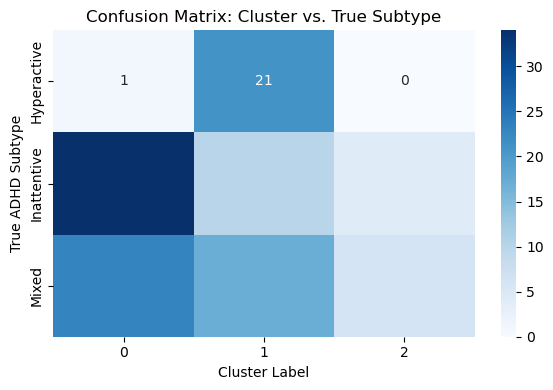

In [153]:
# Compute confusion matrix
cm = confusion_matrix(true_labels, predicted_labels)

# Plot confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d',
            xticklabels=np.unique(predicted_labels),
            yticklabels=le.classes_,
            cmap='Blues')

plt.xlabel('Cluster Label')
plt.ylabel('True ADHD Subtype')
plt.title('Confusion Matrix: Cluster vs. True Subtype')
plt.tight_layout()
plt.show()